In [47]:
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sys import setrecursionlimit
setrecursionlimit(10**6)

In [37]:
def labyrinthe_generator(taille, form=1):
    case = []
    murs = []
    pos = (randint(0, taille[1]-1), randint(0, taille[0]-1))
    case = np.zeros((taille[1], taille[0]), dtype='int')
    murs = np.ones((taille[1], taille[0], 4), dtype='int') # [h, d, b, g]
    generer_labyrinthe(case, murs, pos, pos)
    
    l = []
    for i in range(len(case) * 2 - 1, 0, -1):
        t = []
        if i % 2 != 0:
            for j in range(0, len(case[0])-1):
                t.append(0)
                t.append(murs[i//2, j, 1])
            t.append(0)
            l.append(t)
        else:
            for j in range(0, len(case[0])-1):
                t.append(murs[i//2, j, 2])
                t.append(0)
            t.append(murs[i//2, j+1, 2])
            l.append(t)
    
    if form == 1:
        return l
    else:
        return case, murs, l

def generer_labyrinthe(case, murs, position, back):
    r = [0, 1, 2, 3]
    if case.mean() == 2:
        return
    else:
        for i in range(0, 4):
            rand = choice(r)
            r.remove(rand)
            if position[0] + 1 < len(case) and case[position[0]+1, position[1]] == 0 and rand == 0:
                case[position[0], position[1]] = 1
                murs[position[0], position[1], 0] = 0
                murs[position[0] +1, position[1], 2] = 0
                generer_labyrinthe(case, murs, (position[0] + 1, position[1]), position)
                break
            elif position[0] - 1 >= 0 and case[position[0]-1, position[1]] == 0 and rand == 1:
                case[position[0], position[1]] = 1
                murs[position[0], position[1], 2] = 0
                murs[position[0] -1, position[1], 0] = 0
                generer_labyrinthe(case, murs, (position[0] - 1, position[1]), position)
                break
            elif position[1] + 1 < len(case[0]) and case[position[0], position[1]+1] == 0 and rand == 2:
                case[position[0], position[1]] = 1
                murs[position[0], position[1], 1] = 0
                murs[position[0], position[1]+1, 3] = 0
                generer_labyrinthe(case, murs, (position[0], position[1] + 1), position)
                break
            elif position[1] - 1 >= 0 and case[position[0], position[1]-1] == 0 and rand == 3:
                case[position[0], position[1]] = 1
                murs[position[0], position[1], 3] = 0
                murs[position[0], position[1]-1, 1] = 0
                generer_labyrinthe(case, murs, (position[0], position[1] - 1), position)
                break
        if position[0] - 1 >= 0 and case[position[0]-1, position[1]] == 1:
            case[position[0], position[1]] = 2
            generer_labyrinthe(case, murs, (position[0] - 1, position[1]), position)
        elif position[1] + 1 < len(case[0]) and case[position[0], position[1]+1] == 1:
            case[position[0], position[1]] = 2
            generer_labyrinthe(case, murs, (position[0], position[1] + 1), position)
        elif position[1] - 1 >= 0 and case[position[0], position[1]-1] == 1:
            case[position[0], position[1]] = 2
            generer_labyrinthe(case, murs, (position[0], position[1] - 1), position)
        elif position[0] + 1 < len(case) and case[position[0]+1, position[1]] == 1:
            case[position[0], position[1]] = 2
            generer_labyrinthe(case, murs, (position[0]+1, position[1]), position)
        else:
            return

In [27]:
class Labyrinthe:
    def __init__(self, size:tuple):
        self.taille = size
        self.labyrinthe = np.zeros((2*size[1] - 1, 2*size[0] - 1))
        self.ref = np.zeros((2*size[1] - 1, 2*size[0] - 1))
        self.mfin = mfin = (self.taille[0] - 1)*self.taille[1] + (self.taille[1] - 1)*self.taille[0] - (self.taille[0]*self.taille[1] - 1)
    def ajouterMur(self, coord:tuple, mur:str):
        if (coord[0] + coord[1])%2 == 1:
            self.labyrinte[coord[1]][coord[0]] = 1
            return True
        return False
    
    def afficheLabyrinthe(self):
        t = [[(0, 0), (0, 1*self.taille[1])], [(0, self.taille[1]), (self.taille[0], self.taille[1])], [(self.taille[0], self.taille[1]), (self.taille[0], 0)], [(self.taille[0], 0), (0,0)]]
        for i in range(len(self.labyrinthe)):
            for j in range(len(self.labyrinthe[0])):
                if (i + j)%2==1 and self.labyrinthe[i][j]==1:
                    if i%2==1:
                        t.append([(j/2, self.taille[1] - (i + 1)/2), (j/2 + 1, self.taille[1] - (i + 1)/2)])
                    else:
                        t.append([((j + 1)/2, self.taille[1] - (i)/2 - 1), ((j + 1)/2, self.taille[1] - (i)/2)])
        d = sum([plot(line2d(i)) for i in t])
        d.show(axes=False)
    
    def pseudoVieille(self):
        for i in range(len(self.labyrinthe)):
            for j in range((i + 1)%2, len(self.labyrinthe[0]), 2):
                self.labyrinthe[i][j] = bool(randint(0, 1))
                
    def pseudo(self, murs):
        self.labyrinthe = np.zeros((2*self.taille[1] - 1, 2*self.taille[0] - 1)) 
        for k in range(murs):
            i = randint(0, len(self.labyrinthe) - 1)
            if i%2==0:
                j = 1 + randint(0, self.taille[1] - 2)*2
            else:
                j = randint(0, self.taille[1] - 1)*2
            if self.labyrinthe[i][j] == 1:
                k = k - 1
            else:
                self.labyrinthe[0]
        #print(self.labyrinthe)
                
    def mursinf(self):
        compte = 0
        for i in range(len(self.labyrinthe)):
            for j in range((i + 1)%2, len(self.labyrinthe[0]), 2):
                if self.labyrinthe[i][j]:
                    compte = compte + 1
        if compte < self.mfin:
            return True
    
    def estBranche(self, pos, a, d, b=True):
        #print(pos)
        #print(d)
        if self.ref[pos[0]][pos[1]]==1:
            return a, False
        if (a==True and (pos[0]==0 or pos[0]==len(self.labyrinthe) or pos[1]==0 or pos[1]==len(self.labyrinthe[0]))):
            self.ref[pos[0]][pos[1]]=1
            return a, False
        self.ref[pos[0]][pos[1]]=1
        #print(self.ref)
        #print(self.labyrinthe)
        a = a + 1
        ver = [True, True, True, True, True, True, True, True, True, True, True, True]
        if d == "b":
            if (pos[0] + 1 < len(self.labyrinthe)) and (pos[1] - 1 >=0) and (self.labyrinthe[pos[0] + 1][pos[1] - 1] == 1):
                #print("bg")
                a, ver[0] = self.estBranche([pos[0] + 1, pos[1] - 1], a, "g")
            if (pos[0] + 1 < len(self.labyrinthe)) and (pos[1] + 1 < len(self.labyrinthe[0])) and (self.labyrinthe[pos[0] + 1][pos[1] + 1] == 1):
                #print("bd")
                a, ver[1] = self.estBranche([pos[0] + 1, pos[1] + 1], a, "d")
            if (pos[0] + 2 < len(self.labyrinthe)) and (self.labyrinthe[pos[0] + 2][pos[1]] == 1):
                #print("bb")
                a, ver[2] = self.estBranche([pos[0] + 2, pos[1]], a, "b")
        if d == "h":
            if (pos[0] - 1 >= 0) and (pos[1] - 1 >=0) and (self.labyrinthe[pos[0] - 1][pos[1] - 1] ==1):
                #print("hg")
                a, ver[3] = self.estBranche([pos[0] - 1, pos[1] - 1], a, "g")
            if (pos[0] - 1 >= 0) and (pos[1] + 1 < len(self.labyrinthe[0])) and (self.labyrinthe[pos[0] - 1][pos[1] + 1]==1):
                #print("hd")
                a, ver[4] = self.estBranche([pos[0] - 1, pos[1] + 1], a, "d")
            if (pos[0] - 2 >= 0) and (self.labyrinthe[pos[0] - 2][pos[1]]==1):
                #print("hh")
                a, ver[5] = self.estBranche([pos[0] - 2, pos[1]], a, "h")
        if d == "d":
            if (pos[0] - 1 >= 0) and (pos[1] + 1 < len(self.labyrinthe[0])) and (self.labyrinthe[pos[0] - 1][pos[1] + 1] ==1):
                #print("dh")
                a, ver[6] = self.estBranche([pos[0] - 1, pos[1] + 1], a, "h")
            if (pos[1] + 2 < len(self.labyrinthe[0])) and (self.labyrinthe[pos[0]][pos[1] + 2]==1):
                #print("dd")
                a, ver[7] = self.estBranche([pos[0], pos[1] + 2], a, "d")
            if (pos[0] + 1 < len(self.labyrinthe)) and (pos[1] + 1 < len(self.labyrinthe[0])) and (self.labyrinthe[pos[0] + 1][pos[1] + 1] == 1):
                #print("db")
                a, ver[8] = self.estBranche([pos[0] + 1, pos[1] + 1], a, "b")                
        if d == "g":
            if (pos[0] + 1 < len(self.labyrinthe)) and (pos[1] - 1 >= 0) and (self.labyrinthe[pos[0] + 1][pos[1] - 1] == 1):
                #print("gb")
                a, ver[9] = self.estBranche([pos[0] + 1, pos[1] - 1], a, "b")
            if (pos[1] - 2 >= 0) and (self.labyrinthe[pos[0]][pos[1] - 2]==1):
                #print("gg")
                a, ver[10] = self.estBranche([pos[0], pos[1] - 2], a, "g")
            if (pos[0] - 1 >= 0) and (pos[1] - 1 >= 0) and (self.labyrinthe[pos[0] - 1][pos[1] - 1]==1):
                #print("gh")
                a, ver[11] = self.estBranche([pos[0] - 1, pos[1] - 1], a, "h")
        return a, (ver[0]==True and ver[1]==True and ver[2]==True and ver[3]==True and ver[4]==True and ver[5]==True and ver[6]==True and ver[7]==True and ver[8]==True and ver[9]==True and ver[10]==True and ver[11]==True)
        
    def estLabyrinthe(self):
        self.ref = np.zeros((2*self.taille[1] - 1, 2*self.taille[0] - 1))
        #print(self.ref)
        mfin = (self.taille[0] - 1)*self.taille[1] + (self.taille[1] - 1)*self.taille[0] - (self.taille[0]*self.taille[1] - 1)
        compte = 0
        for i in range(len(self.labyrinthe)):
            for j in range((i + 1)%2, len(self.labyrinthe[0]), 2):
                if self.labyrinthe[i][j]:
                    compte = compte + 1
        if compte != mfin:
            return False
        compte = 0
        for i in range(len(self.labyrinthe)):
            for j in range((i + 1)%2, len(self.labyrinthe[0]), 2):
                #print(f"añsdklj  {i}, {j}")
                if((i==0 or i==len(self.labyrinthe) - 1 or j==0 or j==len(self.labyrinthe[0]) - 1) and self.labyrinthe[i][j]==1):
                    if i==0:
                        d = "b"
                    elif i==len(self.labyrinthe)-1:
                        d = "h"
                    elif j==0:
                        d = "d"
                    else:
                        d = "g"
                    sommer, etat = self.estBranche([i, j], 0, d, b=False)
                    compte = compte + sommer
                    if etat == False:
                        return False
        if compte != mfin:
            return False
        return True
    
    def creeVraiLent2(self):
        mfin = (self.taille[0] - 1)*self.taille[1] + (self.taille[1] - 1)*self.taille[0] - (self.taille[0]*self.taille[1] - 1)
        self.pseudo(mfin)
        c = 1
        while not(self.estLabyrinthe()):
            self.pseudo(mfin)
            c = c + 1
        return c
    def creeVraiLent(self):
        self.pseudoVieille()
        c = 1
        while not(self.estLabyrinthe()):
            self.pseudoVieille()
            c = c + 1
        return c
    def creuse(self):
        self.labyrinthe = labyrinthe_generator(self.taille)
    def EnumereDessine(self):
        self.ref = np.zeros((2*self.taille[1] - 1, 2*self.taille[0] - 1))
        total = self.Dessine([0, 1], 0, 0)
        return total
    
    def Dessine(self, coord, total, murs):
        self.labyrinthe[coord[0]][coord[1]]=1
        murs = murs + 1
        if self.estLabyrinthe():
            total = total + 1
            self.afficheLabyrinthe()
        if(murs < self.mfin):
            if(coord[1] + 2 < len(self.labyrinthe[0])):
                total = self.Dessine([coord[0], coord[1] + 2], total, murs)
            elif(coord[0] + 1 < len(self.labyrinthe)):
                total = self.Dessine([coord[0] + 1, int(coord[0]%2==1)], total, murs)
        self.labyrinthe[coord[0]][coord[1]] = 0
        murs = murs - 1
        if(coord[1] + 2 < len(self.labyrinthe[0])):
            total = self.Dessine([coord[0], coord[1] + 2], total, murs)
        elif(coord[0] + 1 < len(self.labyrinthe)):
            total = self.Dessine([coord[0] + 1, int(coord[0]%2==1)], total, murs)
        return total
        
    def CompteTotal(self):
        if self.taille[0]==1 or self.taille[1]==1:
            return 1
        self.ref = np.zeros((2*self.taille[1] - 1, 2*self.taille[0] - 1))
        total = self.CompteSansDessinner([0, 1], 0, 0)
        return total
    
    def CompteSansDessinner(self, coord, total, murs):
        self.labyrinthe[coord[0]][coord[1]]=1
        murs = murs + 1
        if murs==self.mfin and self.estLabyrinthe():
            total = total + 1
        if(murs < self.mfin):
            if(coord[1] + 2 < len(self.labyrinthe[0])):
                total = self.CompteSansDessinner([coord[0], coord[1] + 2], total, murs)
            elif(coord[0] + 1 < len(self.labyrinthe)):
                total = self.CompteSansDessinner([coord[0] + 1, int(coord[0]%2==1)], total, murs)
        self.labyrinthe[coord[0]][coord[1]] = 0
        murs = murs - 1
        if(coord[1] + 2 < len(self.labyrinthe[0])):
            total = self.CompteSansDessinner([coord[0], coord[1] + 2], total, murs)
        elif(coord[0] + 1 < len(self.labyrinthe)):
            total = self.CompteSansDessinner([coord[0] + 1, int(coord[0]%2==1)], total, murs)
        return total
    
    def  StockeTous(self):
        self.ref = np.zeros((2*self.taille[1] - 1, 2*self.taille[0] - 1))
        retour = self.Stocke([0, 1], 0, [])
        return retour
        
    def Stocke(self, coord, murs, retour):
        total = []
        self.labyrinthe[coord[0]][coord[1]]=1
        murs = murs + 1
        if murs==self.mfin and self.estLabyrinthe():
            retour.append(copy(self.labyrinthe))
        if(murs < self.mfin):
            if(coord[1] + 2 < len(self.labyrinthe[0])):
                retour = self.Stocke([coord[0], coord[1] + 2], murs, retour)
            elif(coord[0] + 1 < len(self.labyrinthe)):
                retour = self.Stocke([coord[0] + 1, int(coord[0]%2==1)], murs, retour)
        self.labyrinthe[coord[0]][coord[1]] = 0
        murs = murs - 1
        if(coord[1] + 2 < len(self.labyrinthe[0])):
            retour = self.Stocke([coord[0], coord[1] + 2], murs, retour)
        elif(coord[0] + 1 < len(self.labyrinthe)):
            retour = self.Stocke([coord[0] + 1, int(coord[0]%2==1)], murs, retour)
        return retour
    
    def compteAC(self):
        #if(self.taille[0] < self.taille[1]):
            #l = Labyrinthe((self.taille[1], self.taille[0]))
            #return l.compteAC()
        mat = np.zeros((self.taille[0]*self.taille[1], self.taille[0]*self.taille[1]))
        #print(mat)
        for i in range(self.taille[1]):
            for j in range(self.taille[0]):
                if(i > 0):
                    #print(f"i : {i}, j : {j}, 1")
                    mat[i*self.taille[0] + j][i*self.taille[0] + j]+=1
                    mat[i*self.taille[0] + j][(i - 1)*self.taille[0] + j] = - 1
                if(j < self.taille[0] - 1):
                    #print(f"i : {i}, j : {j}, 2")
                    mat[i*self.taille[0] + j][i*self.taille[0] + j]+=1
                    mat[i*self.taille[0] + j][i*self.taille[0] + j + 1] = -1
                if(i < self.taille[1] - 1):
                    #print(f"i : {i}, j : {j}, 3")
                    mat[i*self.taille[0] + j][i*self.taille[0] + j]+=1
                    mat[i*self.taille[0] + j][(i + 1)*self.taille[0] + j] = - 1
                if(j > 0):
                    #print(f"i : {i}, j : {j}, 4")
                    mat[i*self.taille[0] + j][i*self.taille[0] + j]+=1
                    mat[i*self.taille[0] + j][i*self.taille[0] + j - 1] = - 1
                #print(mat)
        #print(mat)
        matn = mat[0:-1, 0:-1]
        #print(matn)
        return np.linalg.det(matn).round()
    
    def GenereL(self):
        if self.taille[0]==2 and self.taille[1]==2:
            self.creeVraiLent()
            return
        if(self.taille[0]>=self.taille[1]):
            l = Labyrinthe((self.taille[0] - 1, self.taille[1]))
            l.GenereL()
            #l.afficheLabyrinthe()
            self.labyrinthe[::, 0:-2] = l.labyrinthe
            while not(self.estLabyrinthe()):
                for i in range(self.taille[1]*2 - 1):
                    for j in range((i + 1)%2, 3, 2):
                        self.labyrinthe[i][self.taille[0]*2 - 1 - 3 + j] = randint(0, 1)
            return
        if(self.taille[0]<self.taille[1]):
            l = Labyrinthe((self.taille[0], self.taille[1] - 1))
            l.GenereL()
            #l.afficheLabyrinthe()
            self.labyrinthe[0:-2] = l.labyrinthe
            while not(self.estLabyrinthe()):
                for i in range((self.taille[1]*2 - 1) - 3, (self.taille[1]*2 - 1)):
                    for j in range((i + 1)%2, self.taille[0]*2 - 1, 2):
                        self.labyrinthe[i][j] = randint(0, 1)
            return
            
    def GenereSeul(self):
        if self.taille[0]==2 and self.taille[1]==2:
            self.labyrinthe = [[0, 1, 0], [0, 0, 0], [0, 0, 0]]
            return
        if(self.taille[0]>=self.taille[1]):
            l = Labyrinthe((self.taille[0] - 1, self.taille[1]))
            l.GenereSeul()
            #l.afficheLabyrinthe()
            self.labyrinthe[::, 0:-2] = l.labyrinthe
            #while not(self.estLabyrinthe()):
                #print(1)
            for i in range(self.taille[1]*2 - 1):
                if(i%2==1):
                    self.labyrinthe[i][self.taille[0]*2 - 2] = 1
            #self.afficheLabyrinthe()
                #print(self.labyrinthe)
            return
        if(self.taille[0]<self.taille[1]):
            l = Labyrinthe((self.taille[0], self.taille[1] - 1))
            l.GenereSeul()
            #l.afficheLabyrinthe()
            self.labyrinthe[0:-2] = l.labyrinthe
            #while not(self.estLabyrinthe()):
                #print(2)
            for j in range(1, self.taille[0]*2 - 1, 2):
                    self.labyrinthe[2*self.taille[0]][j] = 1
            #self.afficheLabyrinthe()
                #print(self.labyrinthe)
            return
        
                    
        

In [28]:
class Case:
    def __init__(self, coord:tuple, state=(None, None, None, None)):
        self.coordonnee = coord
        self.h = state[0]
        self.b = state[1]
        self.g = state[2]
        self.d = state[3]
    
    def affiche_murs(self):
        print(f"Haut : {self.h}\nBas : {self.b}\nGauche : {self.g}\nDroite : {self.d}")
    
    
    def affiche(self):
        c = []
        if self.h != None and self.h.mur == True:
            t = []
            t.append((self.coordonnee[0]+1, self.coordonnee[1]+1))
            t.append((self.coordonnee[0], self.coordonnee[1]+1))
            c.append(t)
        if self.d != None and self.d.mur == True:
            t = []
            t.append((self.coordonnee[0]+1, self.coordonnee[1]+1))
            t.append((self.coordonnee[0]+1, self.coordonnee[1]))
            c.append(t)
        if self.g != None and self.g.mur == True:
            t = []
            t.append((self.coordonnee[0], self.coordonnee[1]+1))
            t.append((self.coordonnee[0], self.coordonnee[1]))
            c.append(t)
        if self.b != None and self.b.mur == True:
            t = []
            t.append((self.coordonnee[0], self.coordonnee[1]))
            t.append((self.coordonnee[0]+1, self.coordonnee[1]))
            c.append(t)
        return c

class Mur:
    def __init__(self, m=False, b=False):
        self.mur = m
        self.bord = b
    
class Labyrinthe_1:
    def __init__(self, size:tuple, cast_laby:list = None):
        self.taille = size
        self.cases = []
        self.murs = (self.taille[0]-1) * (self.taille[1]-1)
        
        if cast_laby != None:
            #print(cast_laby)
            self.constructeur(cast_laby)
    def constructeur(self, l:list):
        print((len(l[0])-(len(l[0])-1)/2, len(l)-(len(l)-1)/2-1))
        laby = Labyrinthe_1((len(l[0])-(len(l[0])-1)/2, len(l)-(len(l)-1)/2))
        laby.initEmpty((len(l[0])-(len(l[0])-1)/2, len(l)-(len(l)-1)/2))
        
        a = 0
        b = 0
        for i in range(len(l)-(len(l)-1)/2-1, -1):
            for j in range(0, len(l[0])-(len(l[0])-1)/2):
                print(int(a), int(b))
                if i % 2 == 0:
                    if j % 2 == 1:
                        laby.ajouterMur((int(a), int(b)), 'd', bool(l[(len(l)-(len(l)-1)/2)-1-i][j]))
                else:
                    if j % 2 == 0:
                        laby.ajouterMur((int(a), int(b)), 'b', bool(l[(len(l)-(len(l)-1)/2)-1-i][j]))
                if b == len(l[0])-(len(l[0])-1)/2:
                    b = 0
                else:
                    b += 0.5
            if a == len(l)-(len(l)-1)/2:
                a = 0
            else:
                a += 0.5
                        
        self.cases = laby.cases
        self.taille = laby.taille
        self.murs = laby.murs
        
        
    def initEmpty(self, full = False):
        for i in range(0, self.taille[1]):
            r = []
            for j in range(0, self.taille[0]):
                r.append(Case( (j, i) ))
            self.cases.append(r)
        for i in range(0, self.taille[1]-1):
            for j in range(0, self.taille[0]):
                m = Mur(full)
                self.cases[i][j].h = m
                self.cases[i+1][j].b = m
                if i == 0:
                    m = Mur(True, True)
                    self.cases[i][j].b = m
                if i+1 == self.taille[1]-1:
                    m = Mur(True, True)
                    self.cases[i+1][j].h = m
                
        for i in range(0, self.taille[1]):
            for j in range(0, self.taille[0]-1):
                m = Mur(full)
                self.cases[i][j].d = m
                self.cases[i][j+1].g = m
                m = Mur(True)
                if j == 0:
                    m = Mur(True, True)
                    self.cases[i][j].g = m
                if j+1 == self.taille[0]-1:
                    m = Mur(True, True)
                    self.cases[i][j+1].d = m
                
    # Ajouter un mur dans le labyrinthe
    def ajouterMur(self, coord:tuple, mur:str, state=True):
        if mur == 'h' and self.cases[coord[0]][coord[1]].h.bord == False:
            self.cases[coord[0]][coord[1]].h.mur = bool(state)
            return True
        elif mur == 'b' and self.cases[coord[0]][coord[1]].b.bord == False:
            self.cases[coord[0]][coord[1]].b.mur = bool(state)
            return True
        elif mur == 'g' and self.cases[coord[0]][coord[1]].g.bord == False:
            self.cases[coord[0]][coord[1]].g.mur = bool(state)
            return True
        elif mur == 'd' and self.cases[coord[0]][coord[1]].d.bord == False:
            self.cases[coord[0]][coord[1]].d.mur = bool(state)
            return True
        else:
            return False
        
    # Retourne un tableau représentant la "signature" d'un labyrinthe
    # Permet ensuite de comparer les labyrinthes entre eux
    def signature_labyrinthe(self):
        s = []
        for i in range(0, len(self.cases)):
            for j in range(0, len(self.cases[0])):
                s.append([self.cases[i][j].h.mur, self.cases[i][j].b.mur, self.cases[i][j].g.mur, self.cases[i][j].d.mur])
        return s
    
    def afficheLabyrinthe(self):
        t = []
        for l in self.cases:
            for c in l:
                coord = c.affiche()
                for i in coord:
                    t.append(i)
        d = sum([plot(line2d(i)) for i in t])
        d.show(axes=False)
    
    def get_random_place(self):
        i = randint(0, self.taille[0]-1)
        j = randint(0, self.taille[1]-1)
        return self.cases[i][j]


In [6]:
def get_pseudo_laby(taille:tuple):
    l = Labyrinthe_1(taille)
    l.initEmpty()
    for i in range(0, taille[1]):
        for j in range(0, taille[0]):
            l.ajouterMur((i, j), 'h', randint(0, 1))
            l.ajouterMur((i, j), 'b', randint(0, 1))
            l.ajouterMur((i, j), 'g', randint(0, 1))
            l.ajouterMur((i, j), 'd', randint(0, 1))
    return l

In [7]:
def tableauc(a):
    tab = np.zeros((a[0], a[1]))
    for i in range(1, a[0] + 1):
        for j in range(1, a[1] + 1):
            tab[i - 1][j - 1] = (2**(i*(j - 1) + (i - 1)*j))/Labyrinthe((i, j)).compteAC()
    column_values = range(1, a[0] + 1)
    index_values = range(1, a[1] + 1)
    retour = pd.DataFrame(data = tab, index = index_values, columns = column_values)
    return retour

In [8]:
def tableau(a):
    tab = np.zeros((a[0], a[1]))
    for i in range(a[0]):
        for j in range(a[1]):
            tab[i][j] = int(Labyrinthe((i + 1, j + 1)).compteAC())
    column_values = range(1, a[0] + 1)
    index_values = range(1, a[1] + 1)
    retour = pd.DataFrame(data = tab, index = index_values, columns = column_values)
    return retour

# Labyrinthes et pseudo-labyrinthes

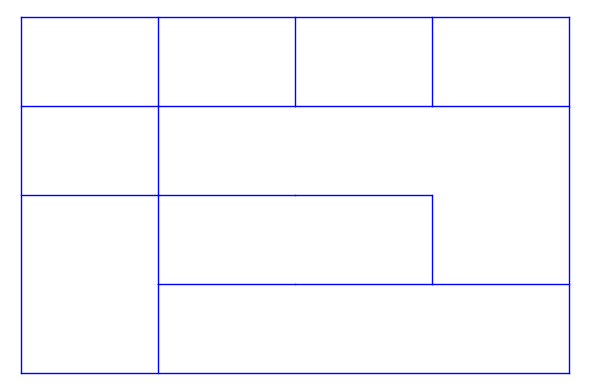

In [11]:
l = Labyrinthe((4, 4))
l.pseudoVieille()
l.afficheLabyrinthe()

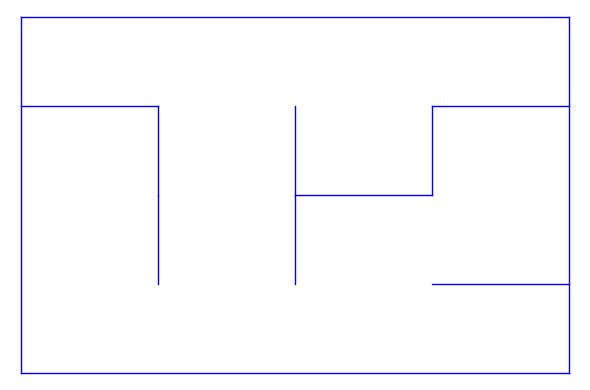

In [12]:
l.creeVraiLent()
l.afficheLabyrinthe()

# Nos objectifs

- Modéliser un labyrinthe
  - Differentes structures des données
- Générer des pseudo-labyrinthes
- Générer des labyrinthes
  - Savoir si un pseudo-labyrinthe est un labyrinthe
  - Méthodes pour générer des labyrinthes
  - Uniformité de la génération
  - Complexité des approches
- Énumerer les labyrinthes
  - Les générer (et les afficher/enregistrer)
  - Les compter sans les générer
- Pour aller plus loin
  - Génération des labyrinthes à partir de labyrinthes plus petits
  - Étude des chemins dans un labyrinthe

# Nos résultats

## Nos structures

### Tableau d'entiers

- Taille (2l - 1)(2L - 1)
  - Cases du tableau représentant des murs
  - Cases ne représentant rien

### Tableau de Case

- La structure Case
  - Un tuple contenant la position
  - 4 booléens pour les murs d'une case
- Un tableau de taille (l - 1)(L - 1) contenant des cases

## Génération des pseudo-labyrinthes

### Avec le tableau d'entier

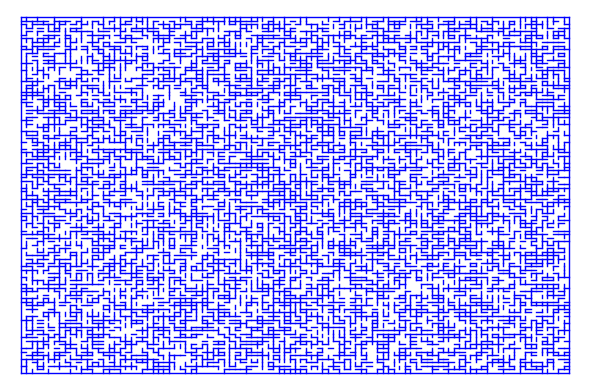

In [13]:
l = Labyrinthe((100, 100))
l.pseudoVieille()
l.afficheLabyrinthe()

### Avec le tableau de Case

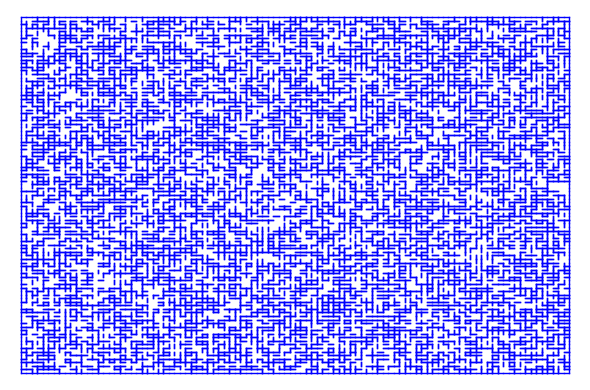

In [14]:
l1 = get_pseudo_laby((100, 100))
l1.afficheLabyrinthe()

## Générer des labyrinthes

### Savoir si un pseudo-labyrinthe est un labyrinthe

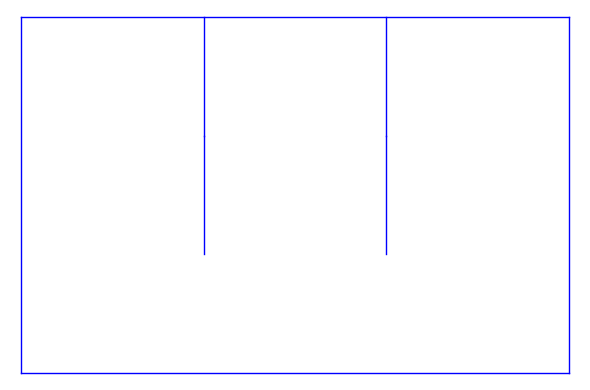

True

In [15]:
l = Labyrinthe((3, 3))
l.labyrinthe = [[0, 1, 0, 1, 0], [0, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
l.afficheLabyrinthe()
l.estLabyrinthe()

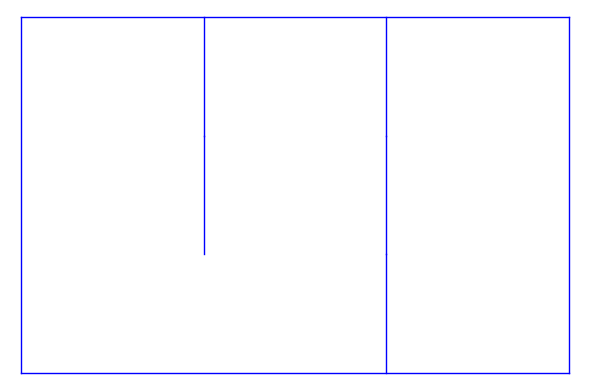

False

In [16]:
l.labyrinthe = [[0, 1, 0, 1, 0], [0, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 0, 0], [0, 0, 0, 1, 0]]
l.afficheLabyrinthe()
l.estLabyrinthe()

### Méthodes pour générer des labyrinthes

#### Génération de pseudo-labyrinthes jusqu'à ce qu'on trouve un qui remplit les conditions

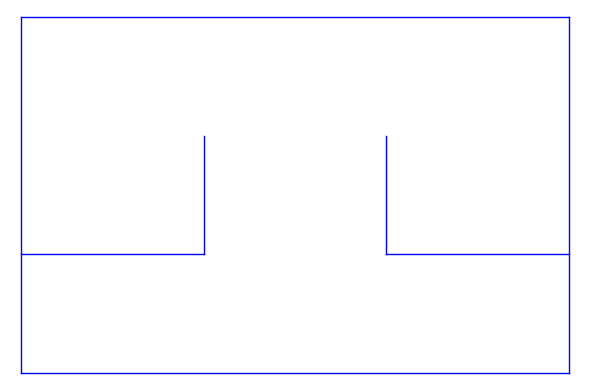

In [17]:
l.creeVraiLent()
l.afficheLabyrinthe()

#### Génération aléatoire par récursivité

Permet de générer des labyrinthes un peu plus grands qu'avec la méthode totalement aléatoire en prenant des labyrinthes un peu plus petits et en modifiant les deux dernieres lignes du labyrinthe de la taille qu'on cherche jusqu'à ce que se soit un labyrinthe

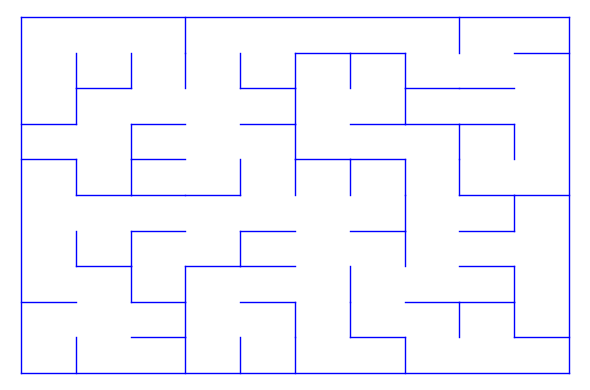

In [18]:
N = Labyrinthe((10, 10))
N.GenereL()
N.afficheLabyrinthe()

#### Génération directe en "creusant"

#### Génération directe par récursivité

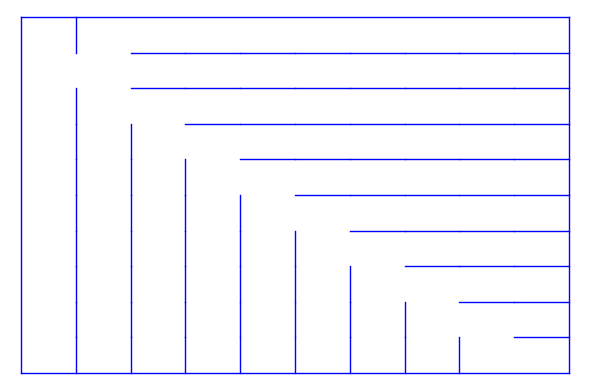

In [19]:
M = Labyrinthe((10, 10))
M.GenereSeul()
M.afficheLabyrinthe()

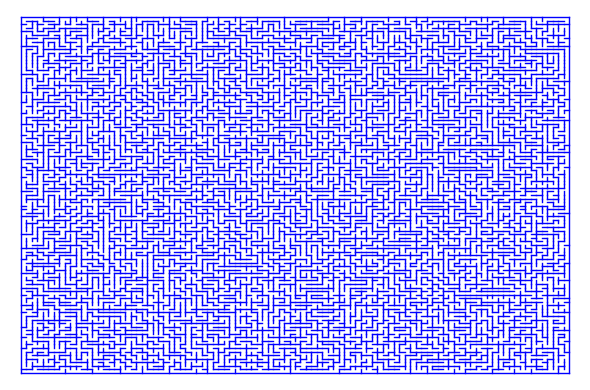

In [20]:
l = Labyrinthe((100, 100))
l.creuse()
l.afficheLabyrinthe()

### Uniformité de la génération

#### Génération uniforme avec CreeVraiLent()

In [21]:
L = Labyrinthe((3, 3))
stock = L.StockeTous()
stock2 = []

for a in range(0, len(stock)):
    c = []
    for b in range(0, len(stock[a])):
        c.append(list(stock[a][b].astype('int')))
    stock2.append(c)
    
frequence = np.zeros(len(stock2), dtype='int')

for i in range(0, 10000):
    L.creeVraiLent()
    k = L.labyrinthe
    for j in range(0, len(stock2)):
        if (k == stock[j]).all():
            frequence[j] += 1
frequence = frequence.reshape(12, 16)
pd.DataFrame(frequence, columns=[i for i in range(16)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,51,48,53,46,46,54,54,65,43,45,46,49,42,57,57,53
1,65,69,57,42,61,33,56,56,56,56,56,51,46,58,59,49
2,68,35,46,64,50,46,53,55,52,62,63,47,47,50,58,60
3,39,58,55,47,50,51,54,68,54,50,46,60,58,50,41,60
4,54,55,57,53,60,53,49,46,51,46,45,55,42,64,60,49
5,47,40,43,50,61,52,50,59,50,50,44,48,55,64,55,61
6,46,57,40,49,47,37,63,67,42,54,53,56,45,44,48,50
7,54,52,46,62,63,38,51,64,60,64,60,54,55,59,59,55
8,54,49,55,53,50,51,41,54,63,36,54,60,51,56,51,51
9,46,48,51,47,52,41,52,52,53,43,45,62,56,54,56,44


#### Génération non uniforme avec creuse()

In [22]:
frequence = np.zeros(len(stock2), dtype='int')

for i in range(0, 10000):
    k = labyrinthe_generator((3, 3))
    for j in range(0, len(stock2)):
        if k == stock2[j]:
            frequence[j] += 1
frequence = frequence.reshape(12, 16)
pd.DataFrame(frequence, columns=[i for i in range(16)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,140,123,0,0,0,96,0,0,0,0,0,0,0,0,0,0
1,0,122,0,94,42,93,48,40,0,83,0,0,0,0,120,392
2,0,35,0,122,0,0,0,0,0,0,0,0,0,217,147,303
3,212,0,0,121,127,124,0,0,145,143,0,0,0,406,34,0
4,0,0,0,0,0,0,0,0,117,95,102,141,0,0,97,46
5,0,60,0,0,0,0,129,232,309,149,0,0,232,103,140,0
6,0,0,0,114,0,52,315,384,68,0,0,293,105,49,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45
8,0,0,0,0,0,0,0,0,0,0,0,253,58,340,117,0
9,0,296,0,0,60,0,41,0,0,102,86,243,233,0,151,0


#### Génération non uniforme par récursivité

In [23]:
L = Labyrinthe((3, 3))
stock = L.StockeTous()
stock2 = []

for a in range(0, len(stock)):
    c = []
    for b in range(0, len(stock[a])):
        c.append(list(stock[a][b].astype('int')))
    stock2.append(c)
    
frequence = np.zeros(len(stock2), dtype='int')

for i in range(0, 10000):
    L.labyrinthe = np.zeros((5, 5))
    L.GenereL()
    k = L.labyrinthe
    for j in range(0, len(stock2)):
        if (k == stock[j]).all():
            frequence[j] += 1
frequence = frequence.reshape(12, 16)
pd.DataFrame(frequence, columns=[i for i in range(16)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,36,37,49,40,33,54,35,36,43,39,50,54,65,43,51,36
1,42,46,56,38,64,53,34,42,55,48,40,62,43,34,37,46
2,44,40,51,65,51,39,46,37,58,43,49,32,39,56,50,27
3,38,34,36,57,33,60,31,46,41,40,35,46,37,50,47,47
4,38,47,60,52,59,51,45,82,67,74,65,64,90,65,63,56
5,48,74,61,75,60,50,47,75,46,59,46,53,54,50,68,58
6,52,37,40,31,48,39,55,36,32,36,46,58,54,57,44,38
7,45,53,44,45,49,60,41,33,39,44,64,46,41,33,47,53
8,40,41,44,54,43,60,49,56,43,45,74,81,56,69,55,83
9,62,71,45,70,68,55,66,67,51,58,77,59,80,51,51,52


### Complexité des approches

#### Calcul de la complexité de CreeVraiLent

pseudo-labyrinthes/labyrinthes

In [24]:
l = Labyrinthe((3, 3))
print(f"{2**(l.taille[0]*(l.taille[1] - 1) + (l.taille[0] - 1)*l.taille[1])}/{l.compteAC()} = {(2**(l.taille[0]*(l.taille[1] - 1) + (l.taille[0] - 1)*l.taille[1]))/l.compteAC()}")
moyenne = 0
for i in range(10000):
    moyenne+=l.creeVraiLent()
float(moyenne/10000)

4096/192.0 = 21.333333333333332


21.4015

In [25]:
tableauc((10, 10))

,1,2,3,4,5,6,7,8,9,10
1,1.0,2.000000,4.000000,8.000000,1.600000e+01,3.200000e+01,6.400000e+01,1.280000e+02,2.560000e+02,5.120000e+02
2,2.0,4.000000,8.533333,18.285714,3.919617e+01,8.402051e+01,1.801058e+02,3.860736e+02,8.275850e+02,1.774006e+03
3,4.0,8.533333,21.333333,54.274120,1.384030e+02,3.530559e+02,9.006630e+02,2.297652e+03,5.861471e+03,1.495302e+04
4,8.0,18.285714,54.274120,167.183673,5.187057e+02,1.611831e+03,5.010335e+03,1.557568e+04,4.842112e+04,1.505304e+05
5,16.0,39.196172,138.403036,518.705708,1.971978e+03,7.526552e+03,2.875979e+04,1.099312e+05,4.202415e+05,1.606533e+06
6,32.0,84.020513,353.055892,1611.831306,7.526552e+03,3.540311e+04,1.669476e+05,7.879622e+05,3.720220e+06,1.756634e+07
7,64.0,180.105806,900.662993,5010.334728,2.875979e+04,1.669476e+05,9.733521e+05,5.684902e+06,3.322676e+07,1.942591e+08
8,128.0,386.073638,2297.651893,15575.681995,1.099312e+05,7.879622e+05,5.684902e+06,4.113319e+07,2.980073e+08,2.160325e+09
9,256.0,827.584955,5861.470588,48421.119813,4.202415e+05,3.720220e+06,3.322676e+07,2.980073e+08,2.678245e+09,2.409406e+10
10,512.0,1774.005763,14953.023435,150530.411868,1.606533e+06,1.756634e+07,1.942591e+08,2.160325e+09,2.409406e+10,2.691271e+11


#### Complexité de creuse

Evolution du temps en fonction du nombre de cases dans le labyrinthe

Text(0.5, 0.98, 'Evolution linéaire du temps')

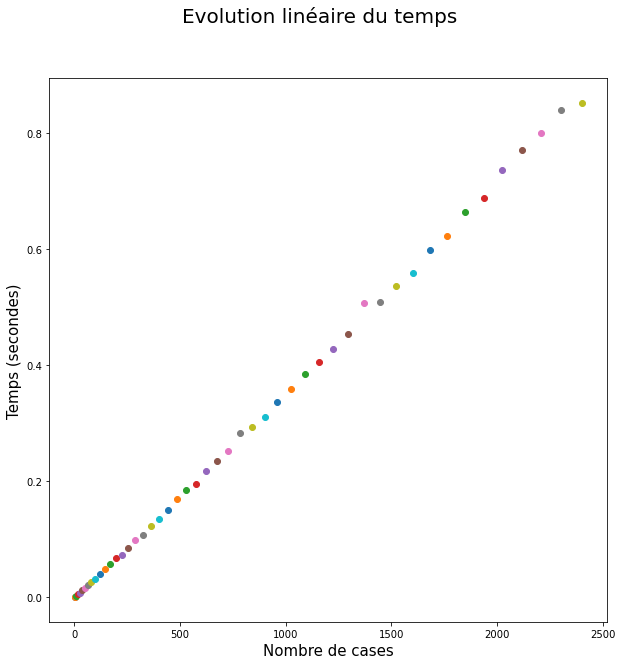

In [74]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
v = [1, 2, 4, 10, 15, 20, 25, 30, 35, 40, 50]
for i in range(1, 50):
    l = Labyrinthe((i, i))
    t1 = time.time()
    l.creuse()
    y = time.time() - t1
    ax.scatter(i*i, y)
ax.set_xlabel('Nombre de cases', fontsize=15)
ax.set_ylabel('Temps (secondes)', fontsize=15)
fig.suptitle('Evolution linéaire du temps', fontsize=20)

## Énumeration des labyrinthes

### Génération de l'ensemble des labyrinthes

#### En les dessinant

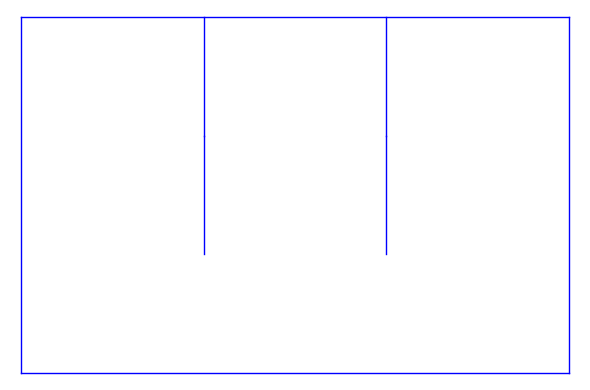

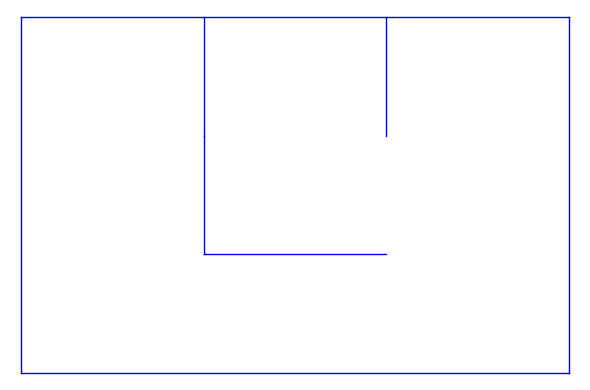

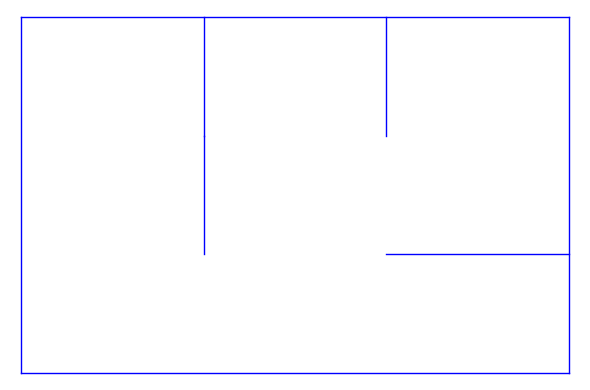

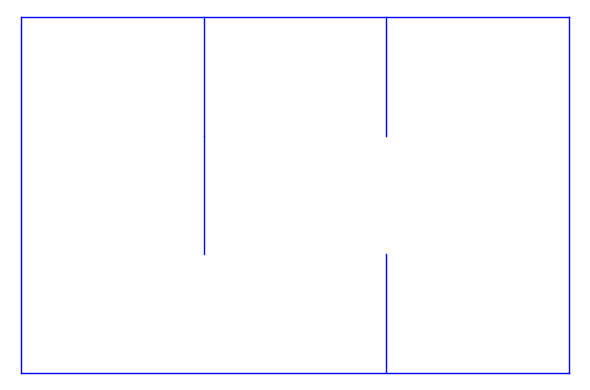

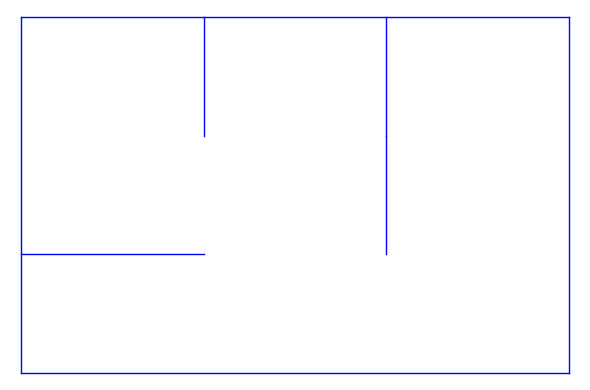

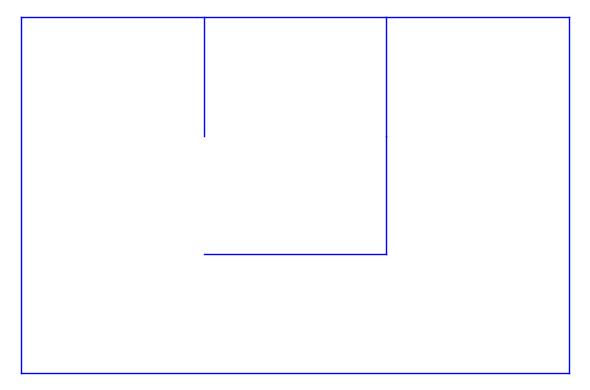

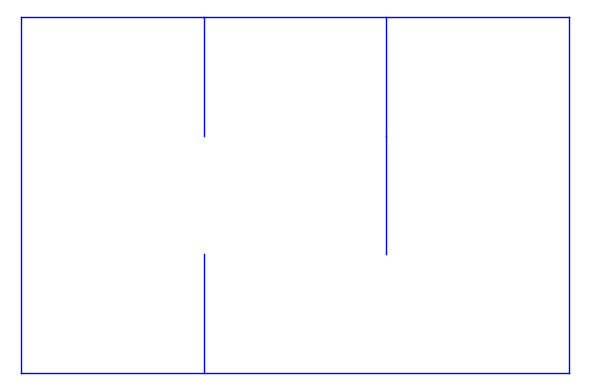

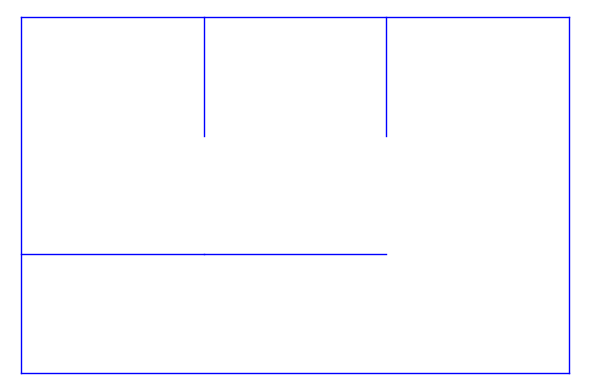

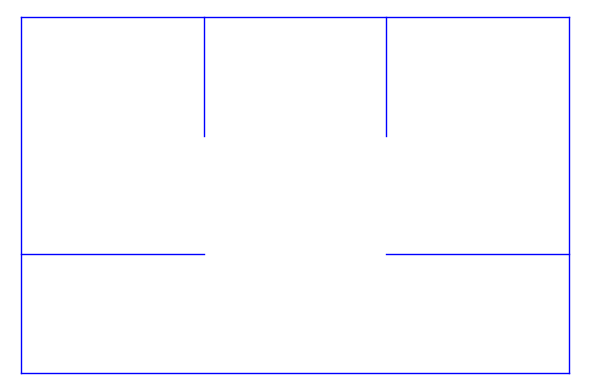

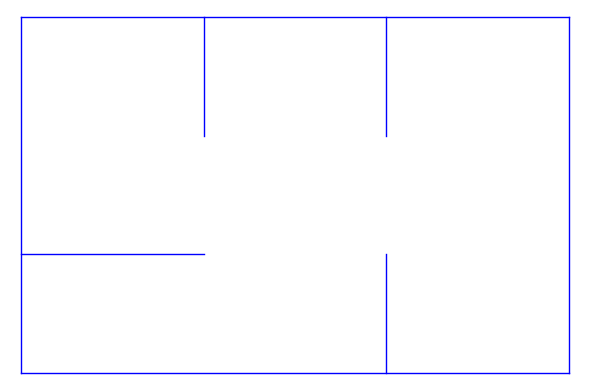

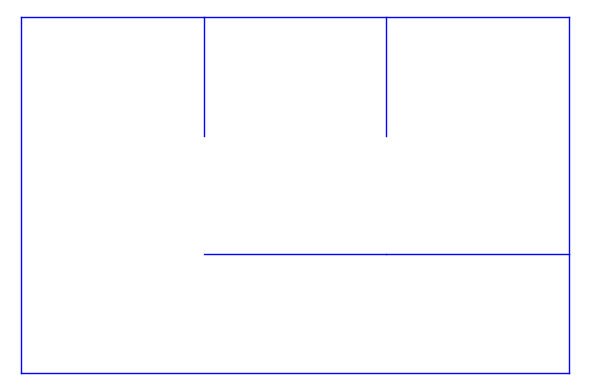

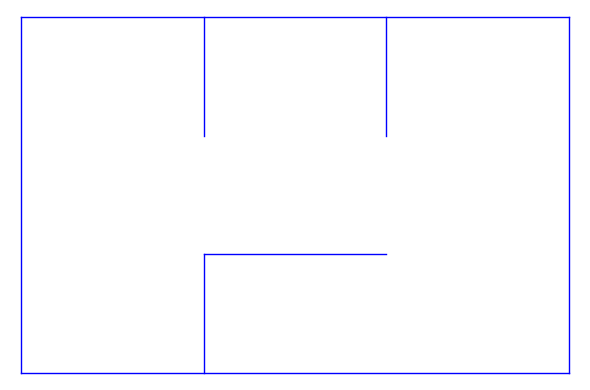

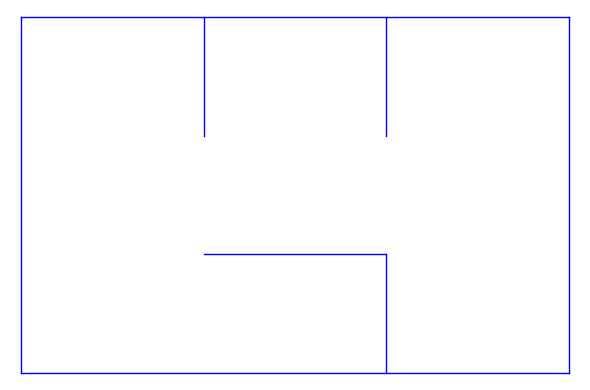

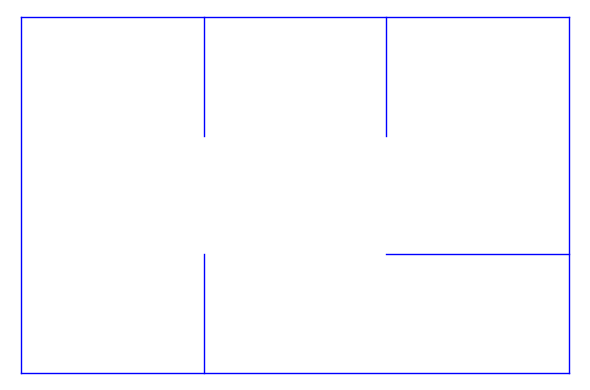

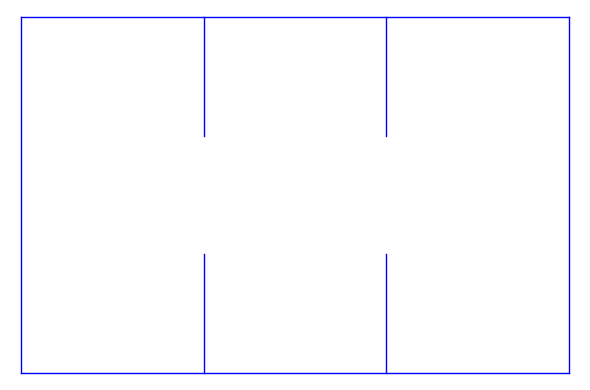

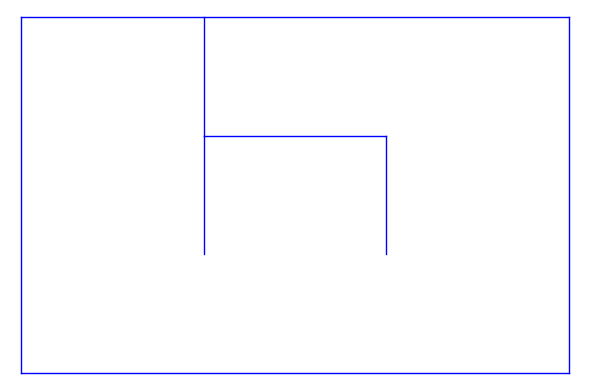

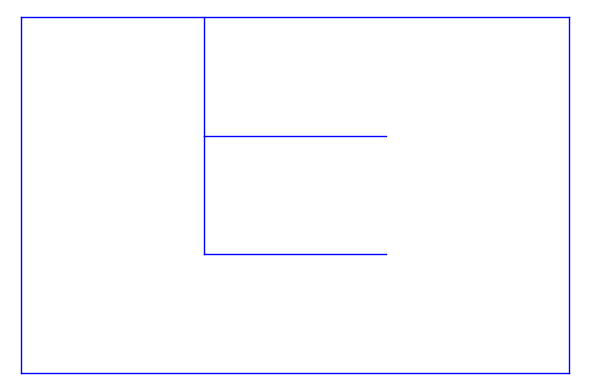

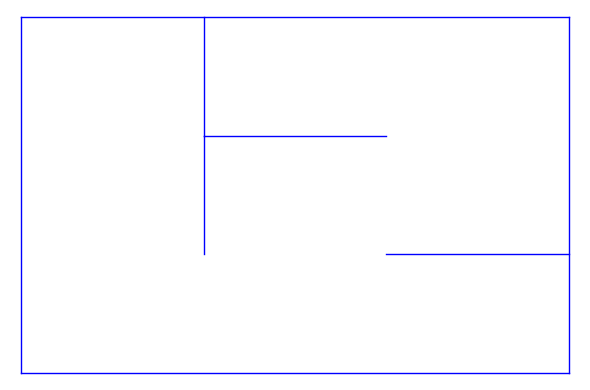

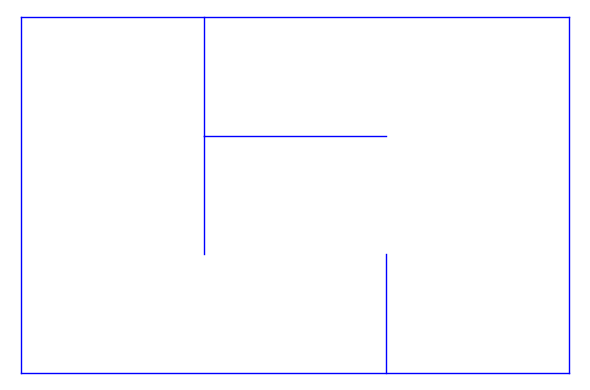

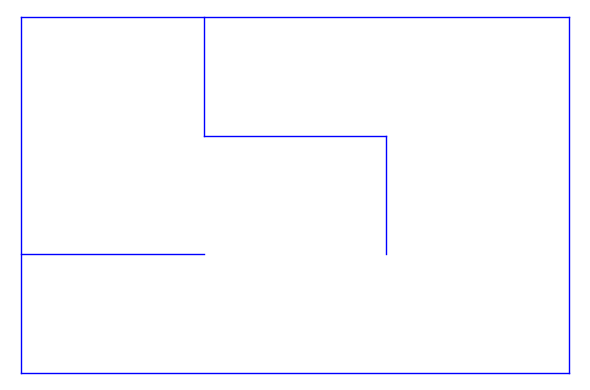

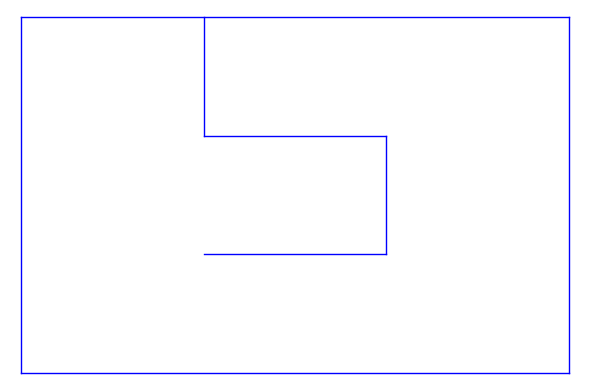

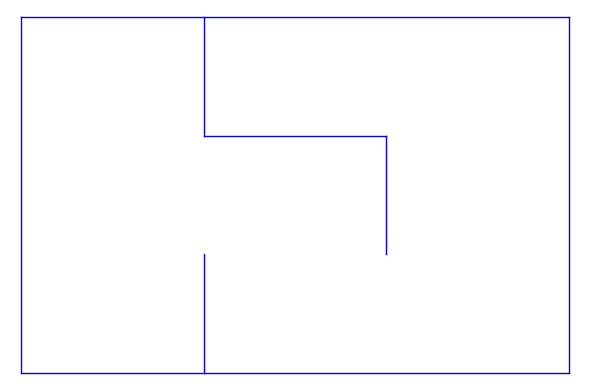

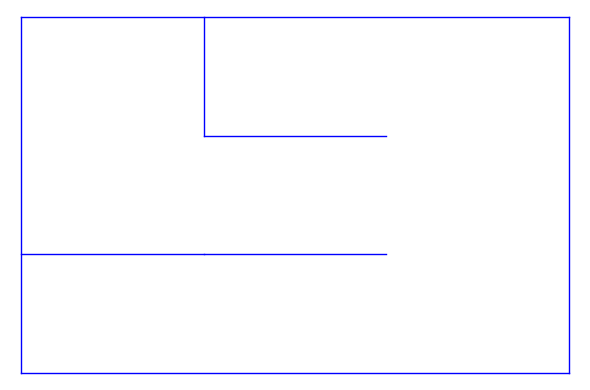

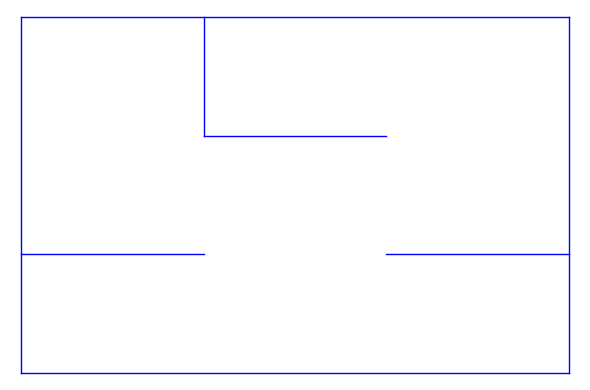

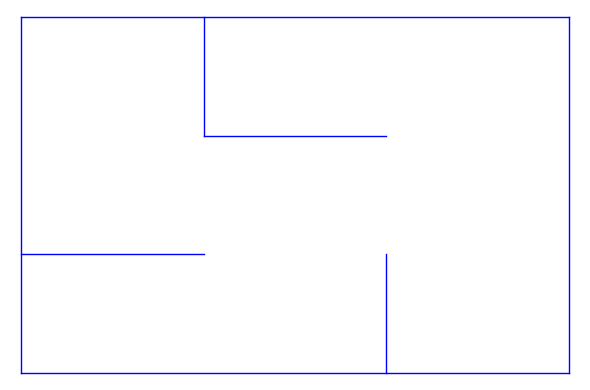

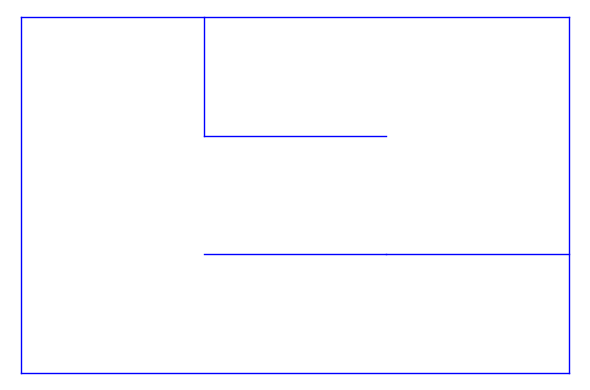

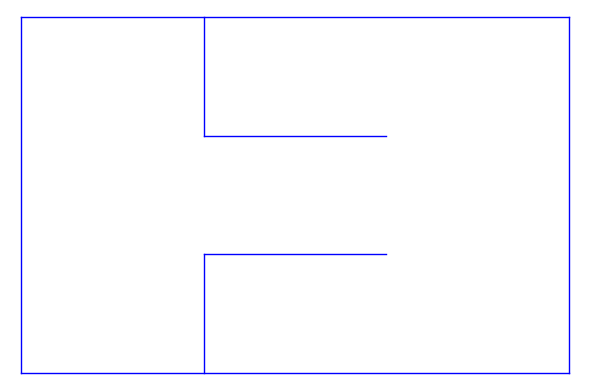

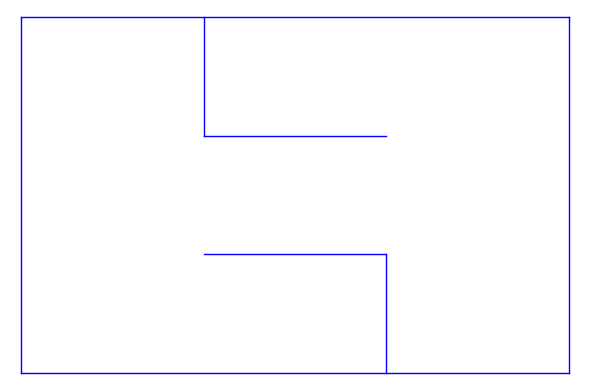

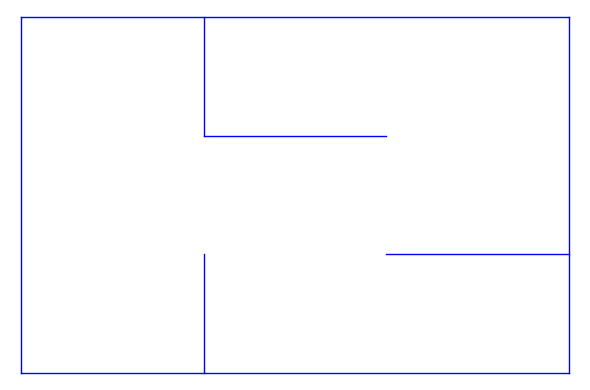

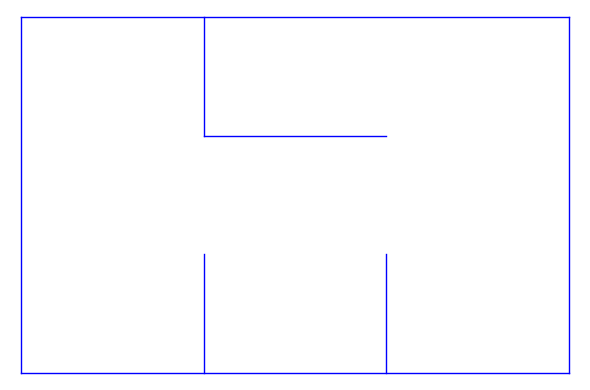

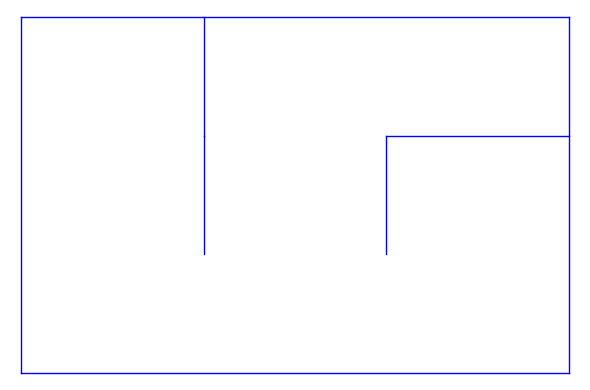

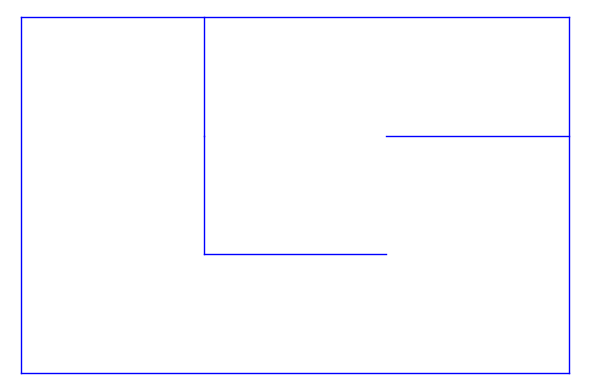

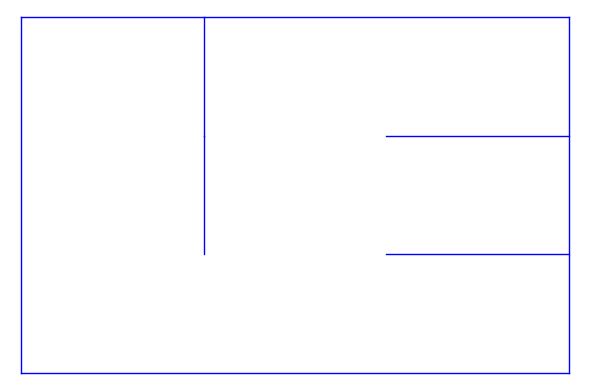

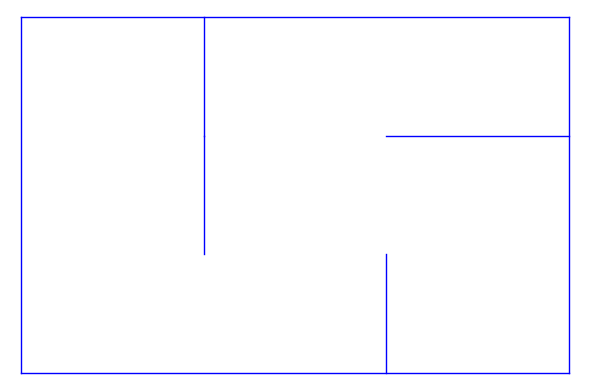

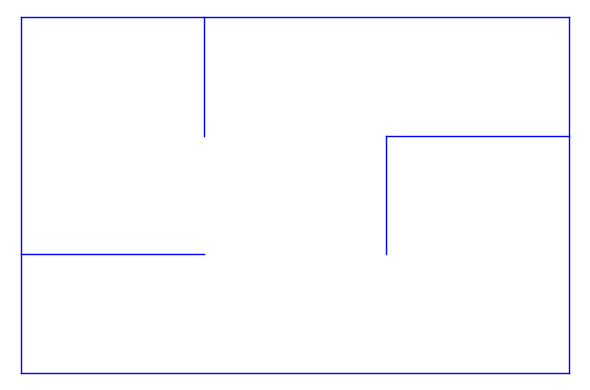

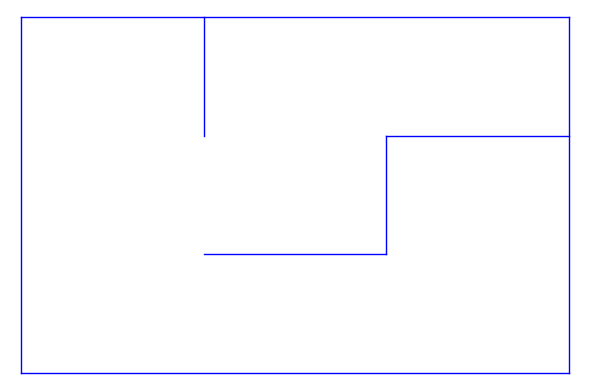

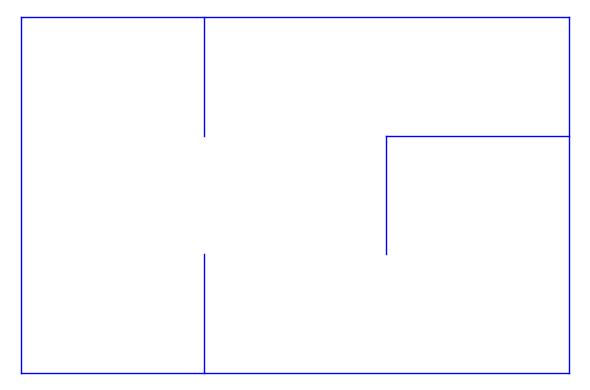

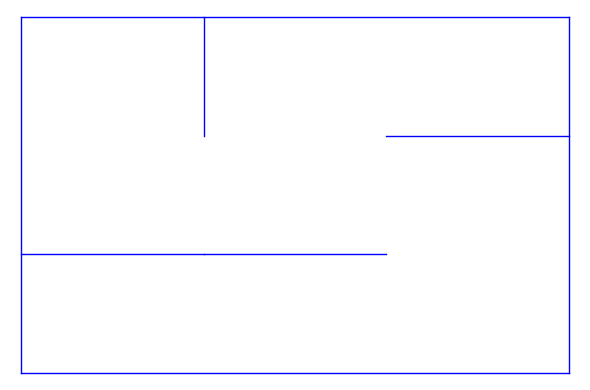

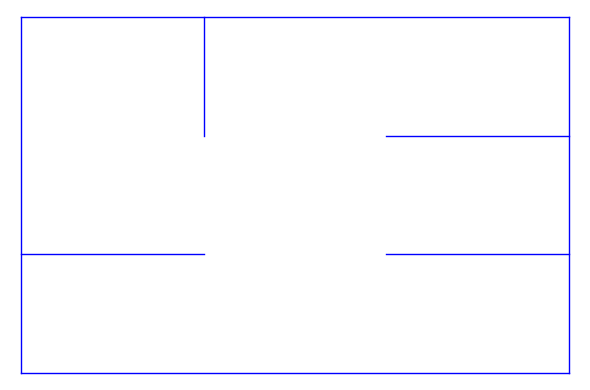

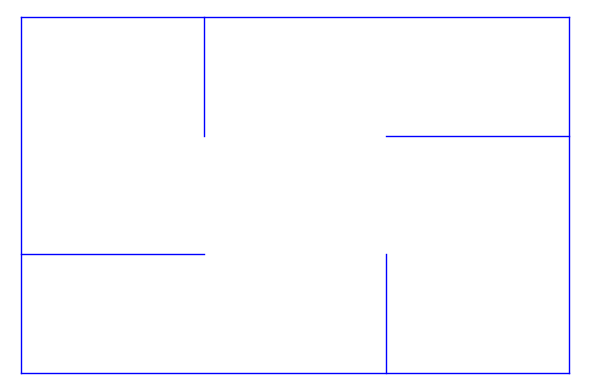

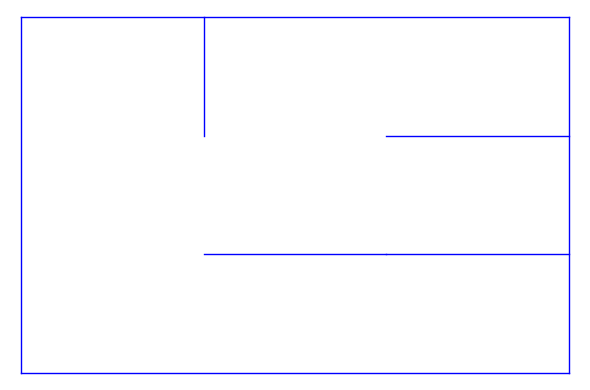

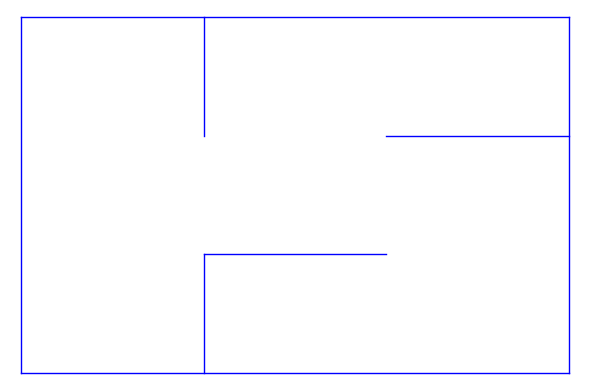

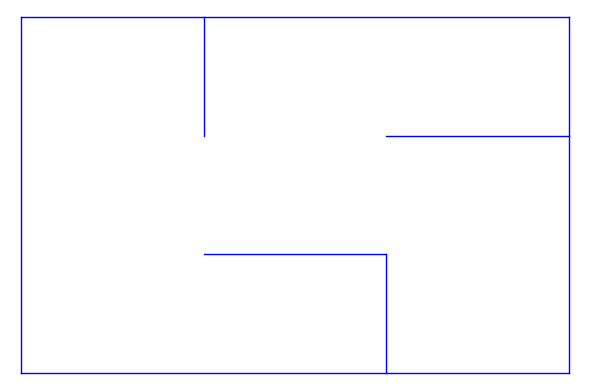

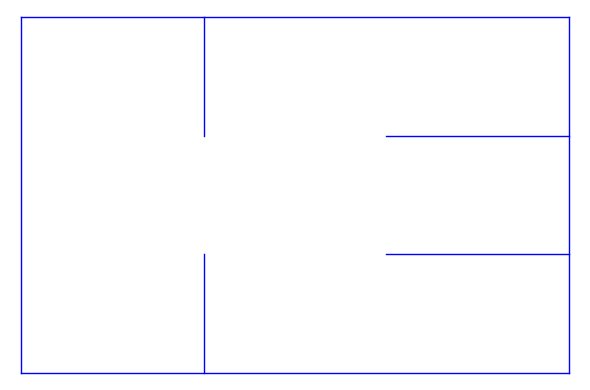

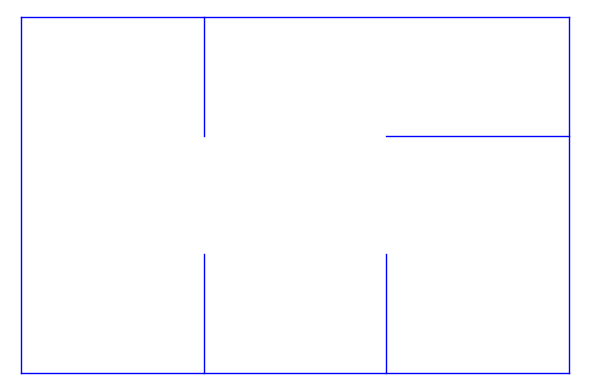

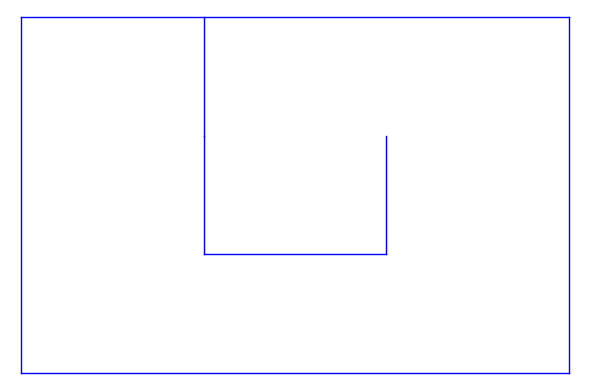

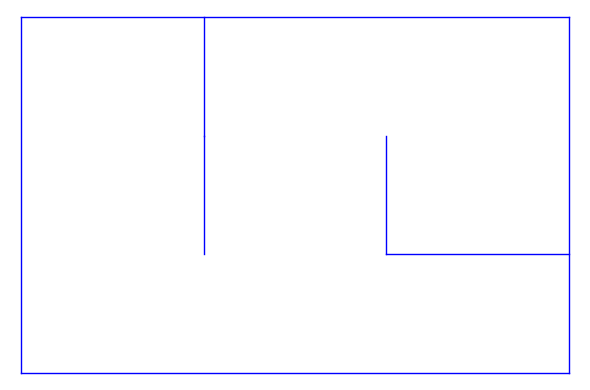

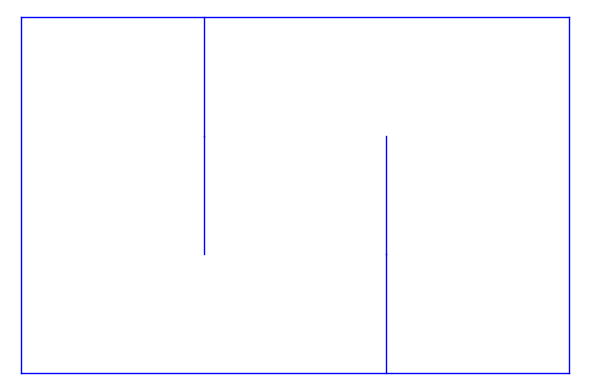

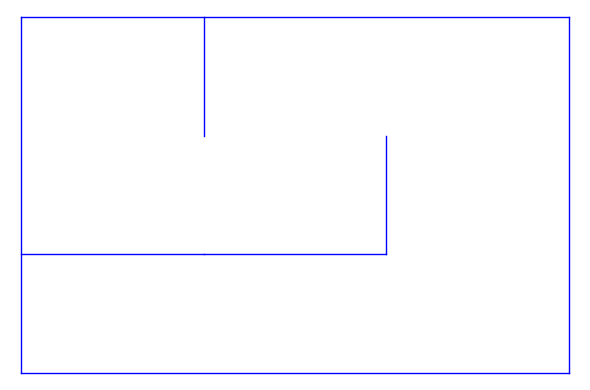

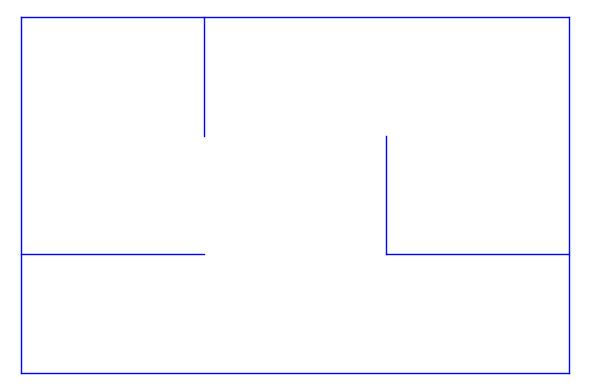

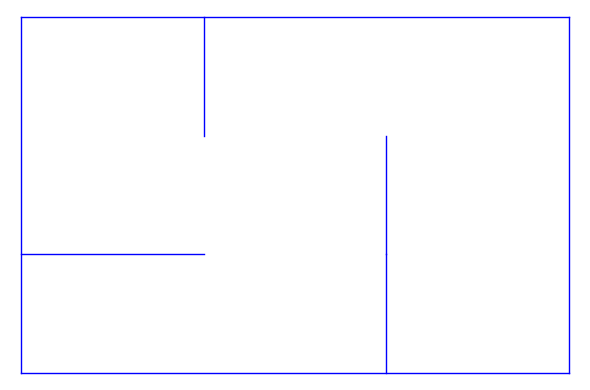

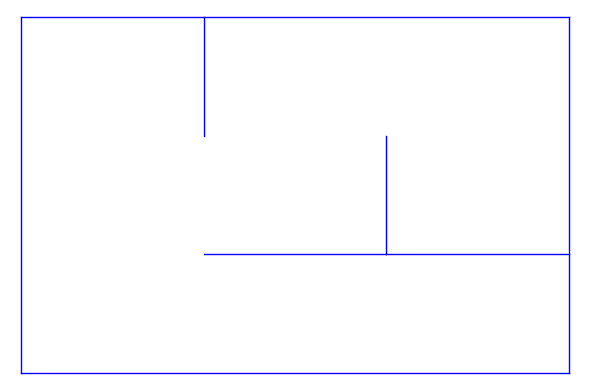

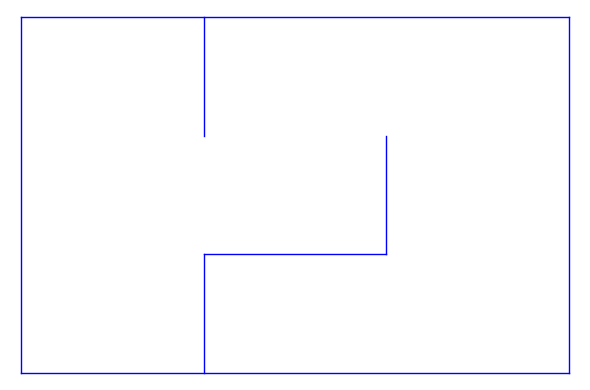

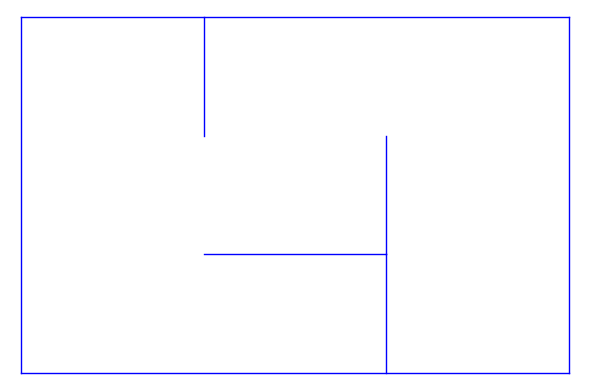

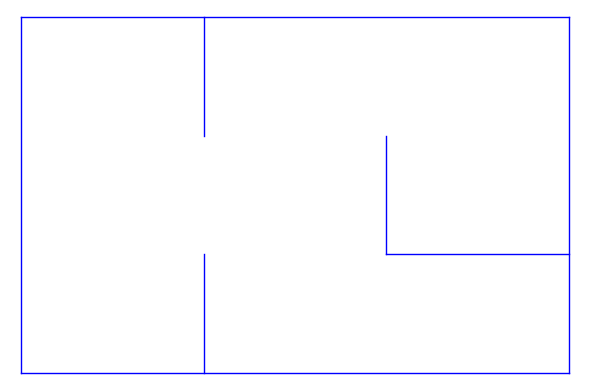

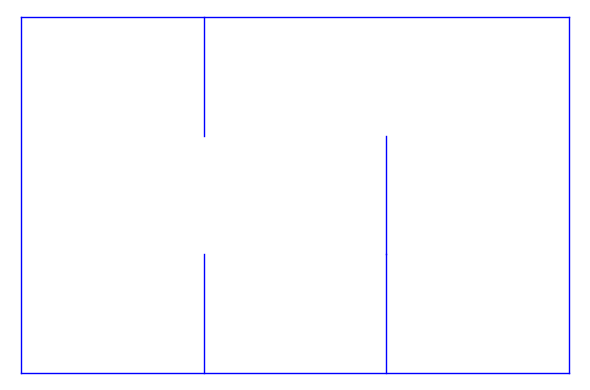

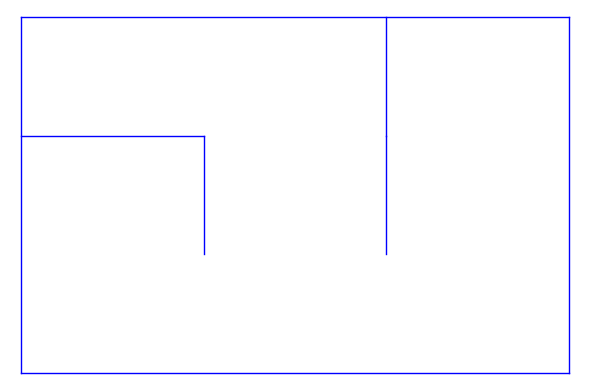

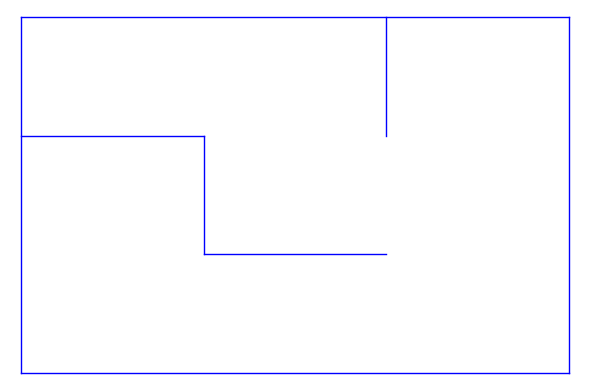

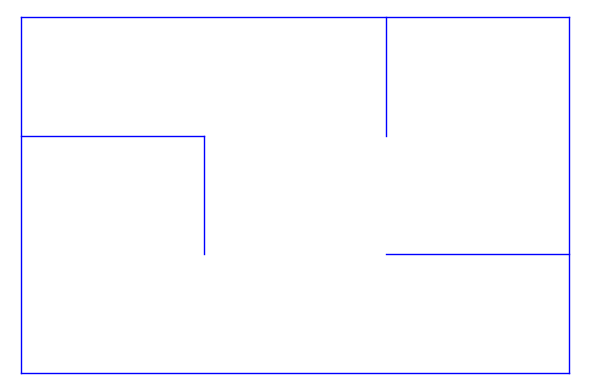

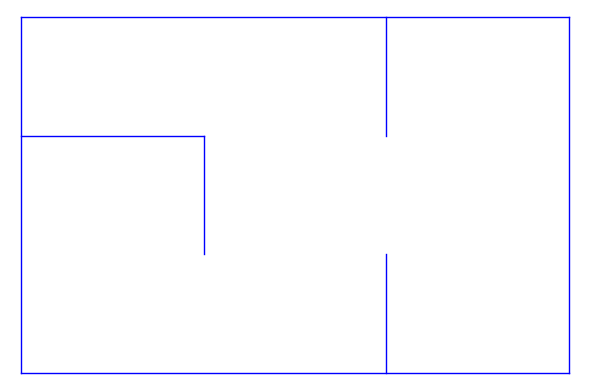

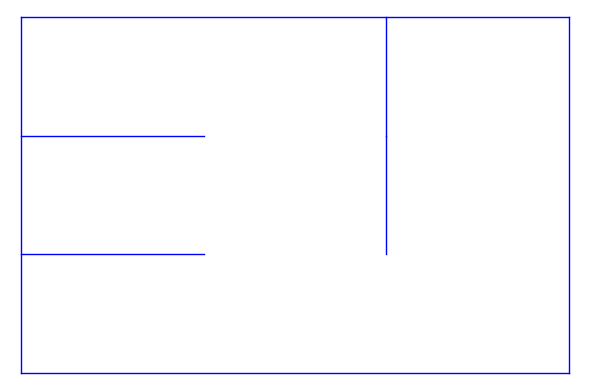

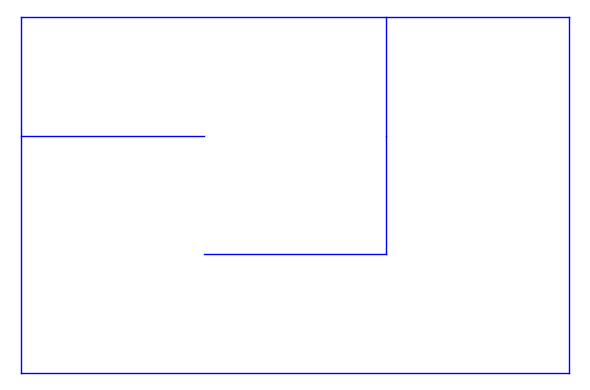

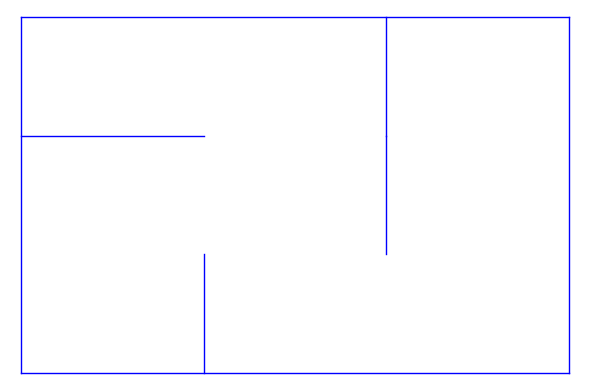

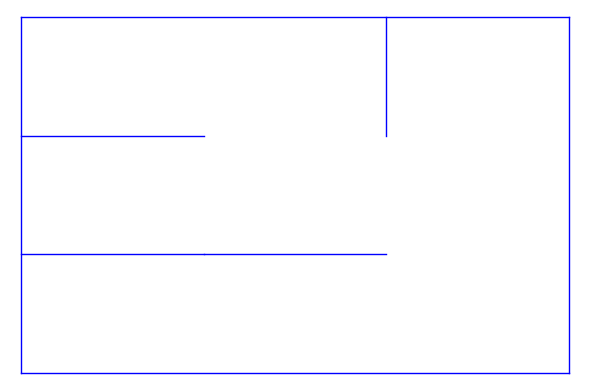

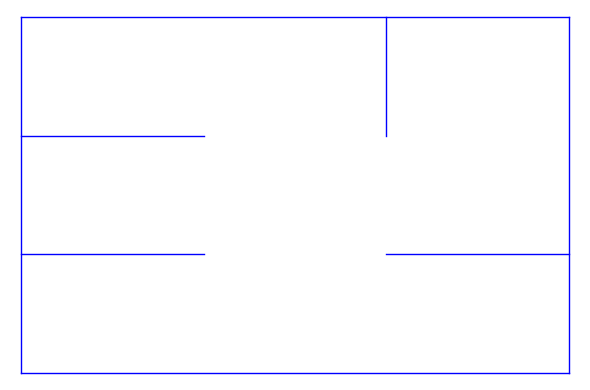

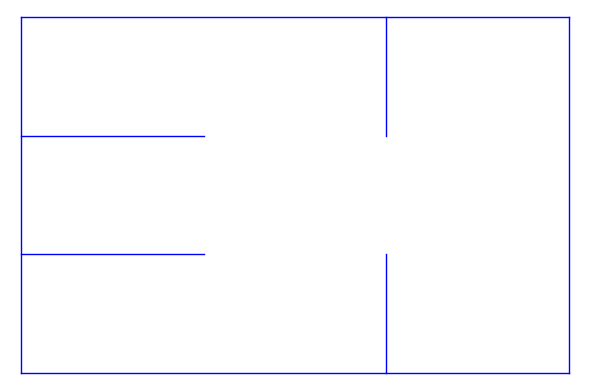

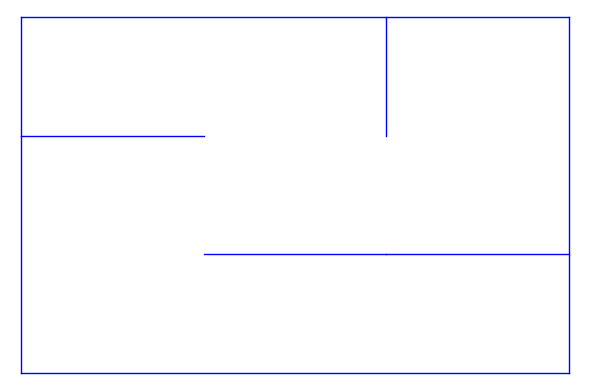

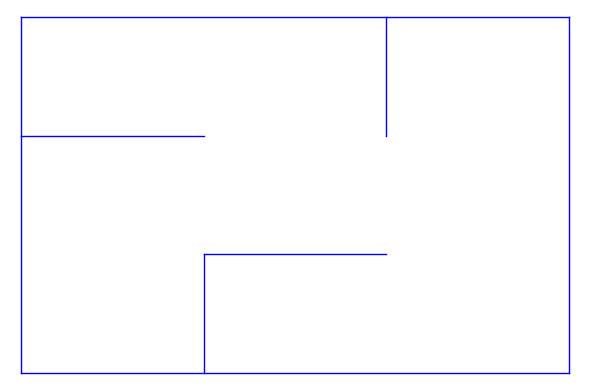

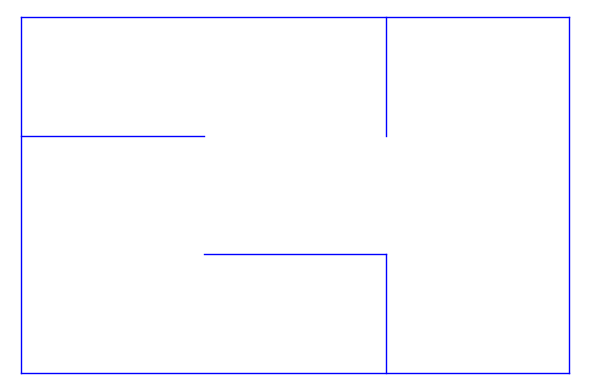

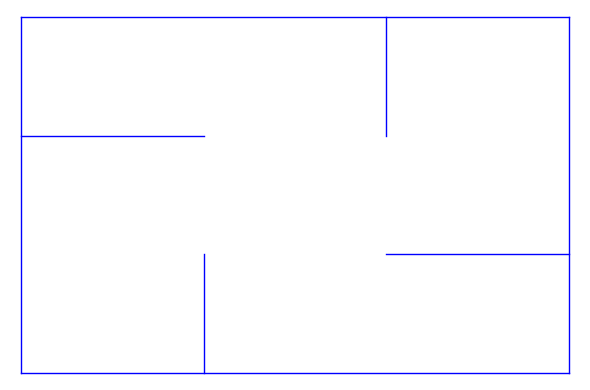

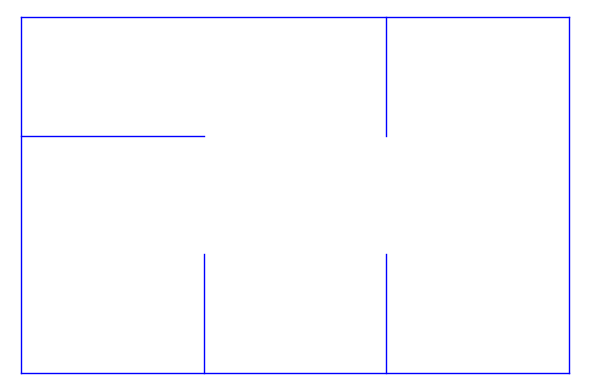

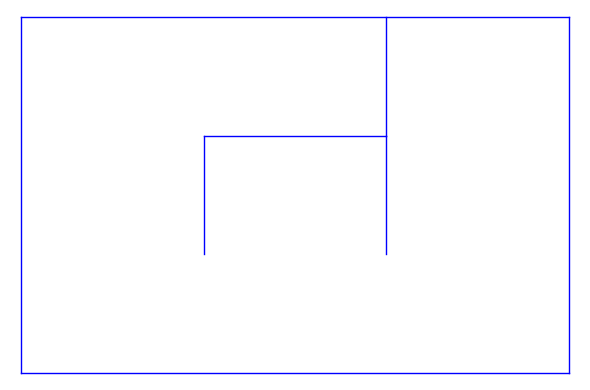

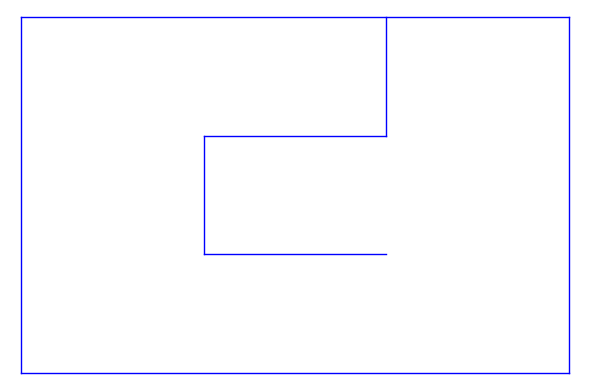

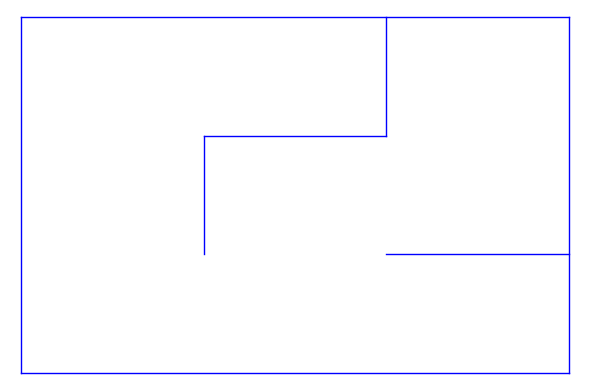

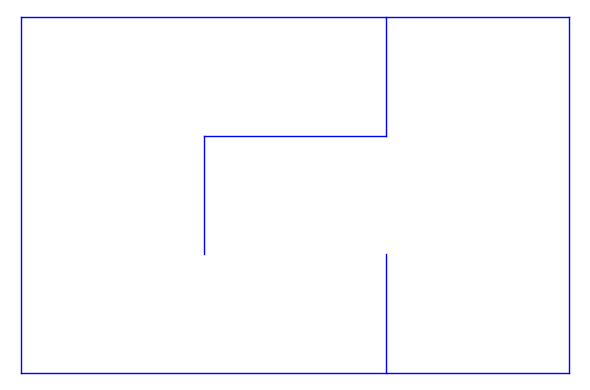

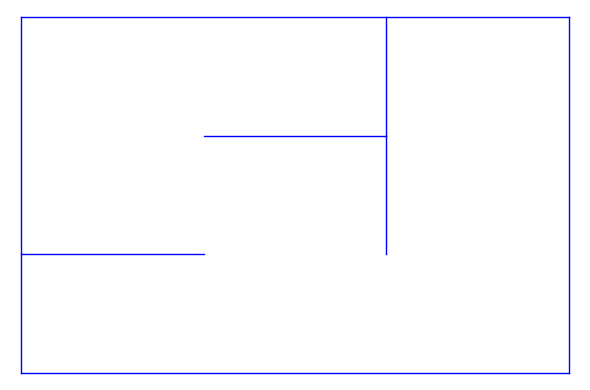

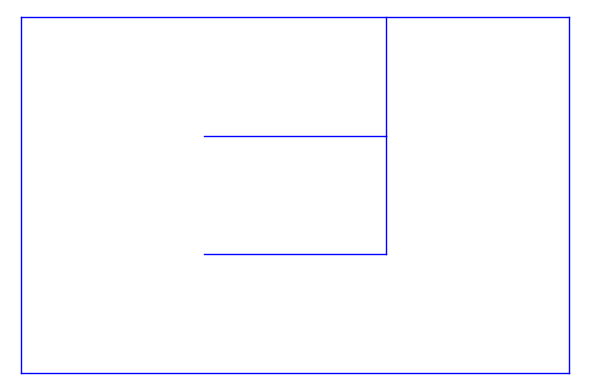

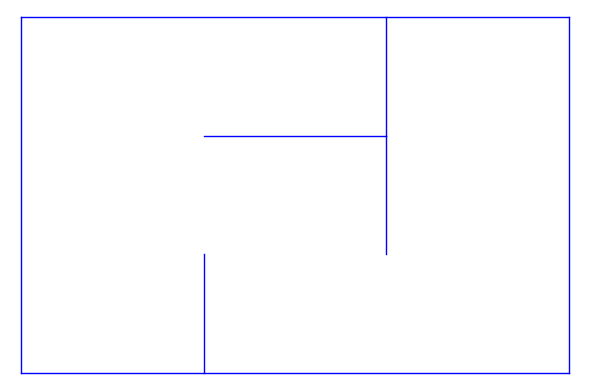

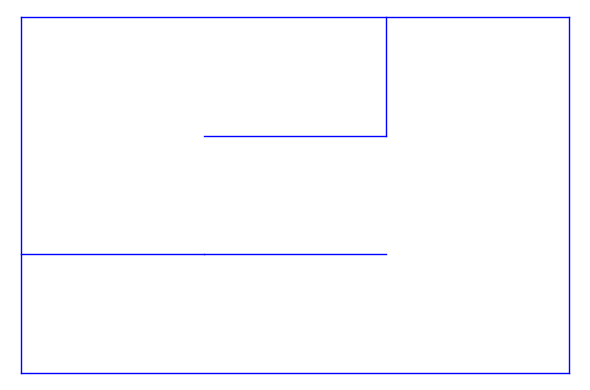

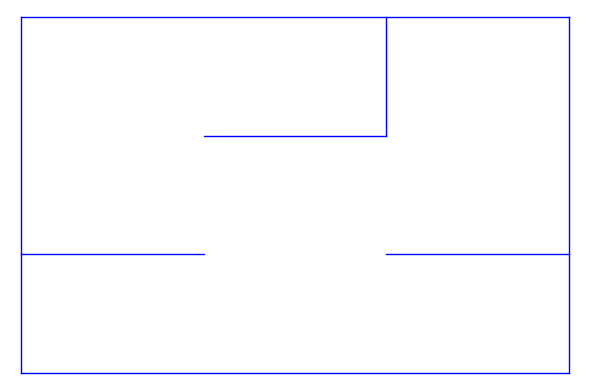

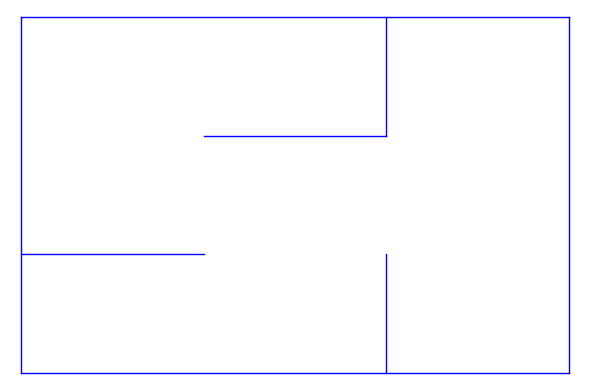

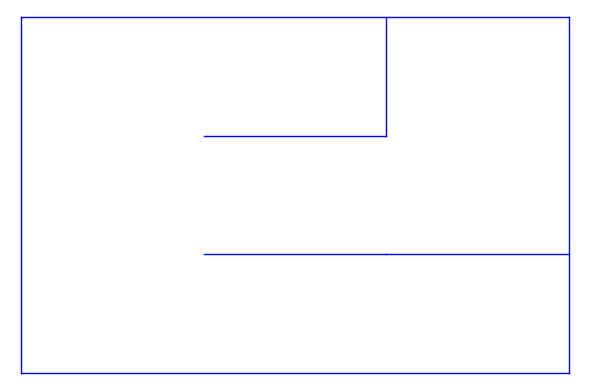

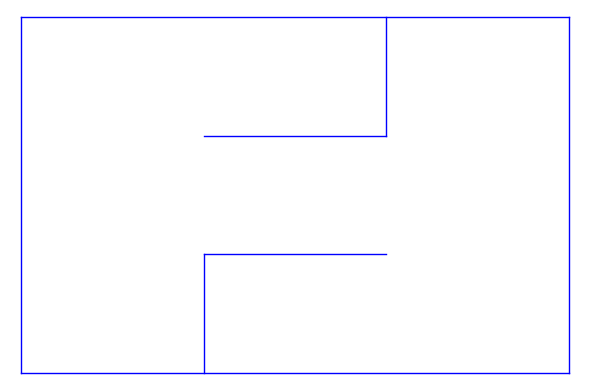

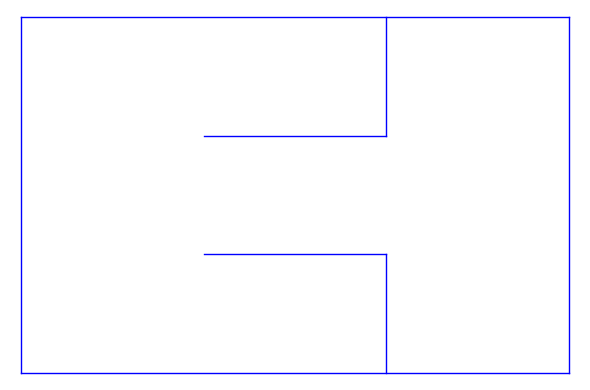

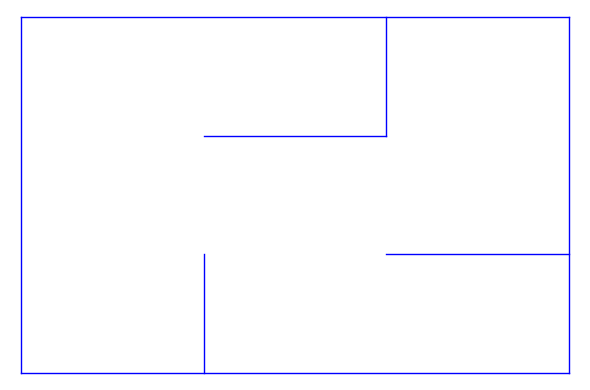

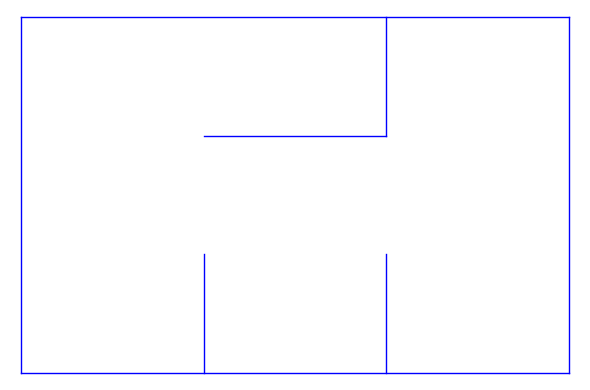

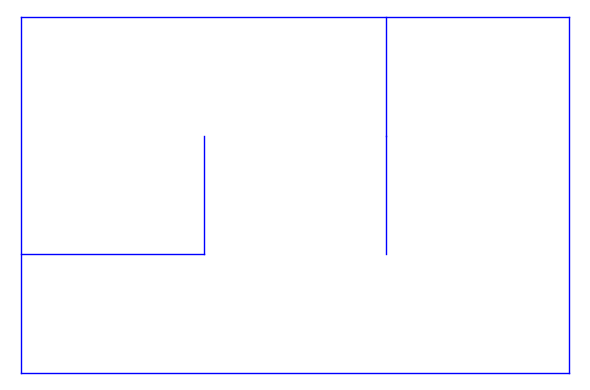

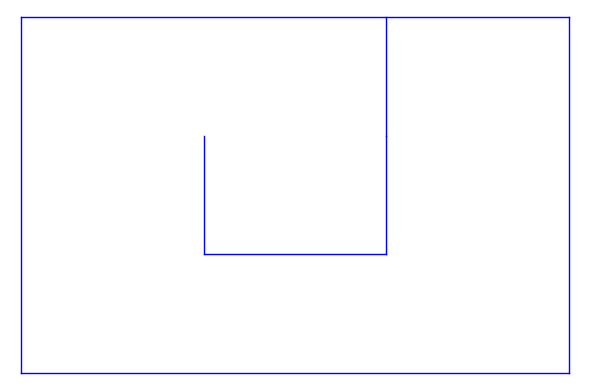

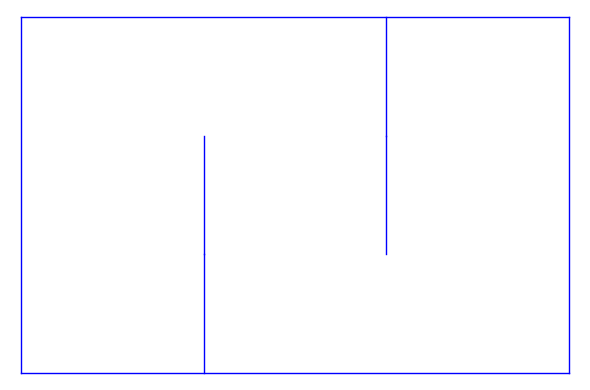

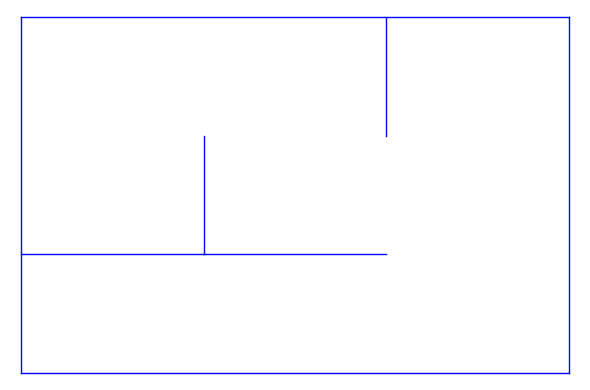

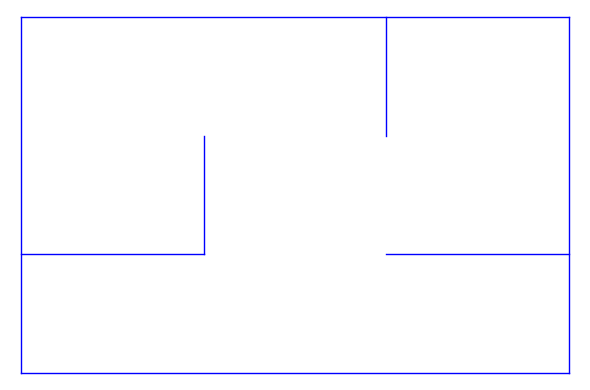

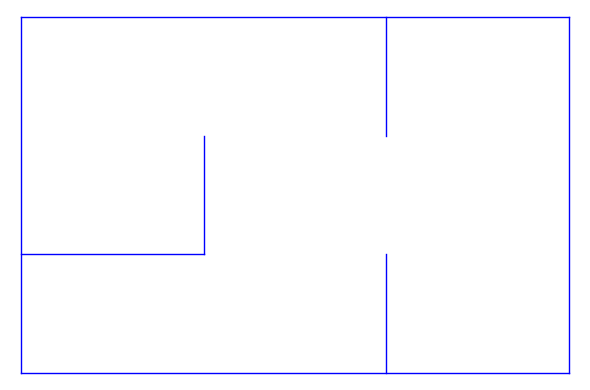

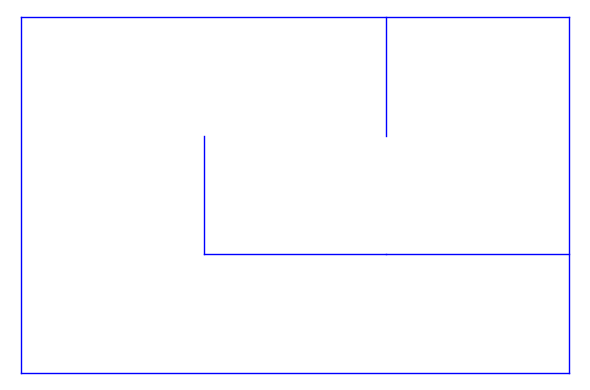

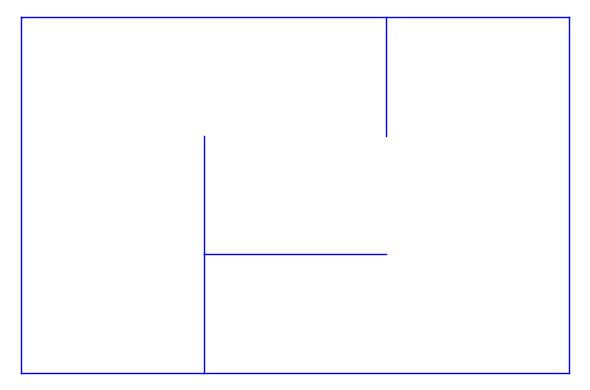

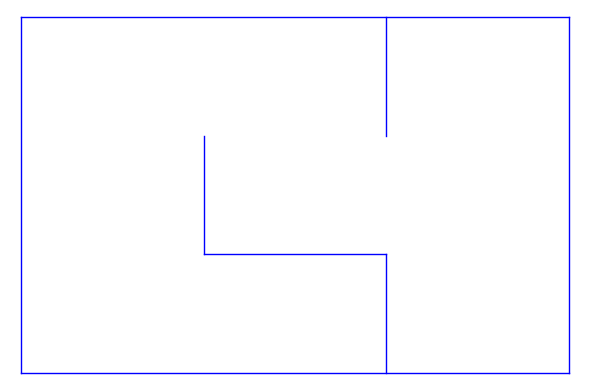

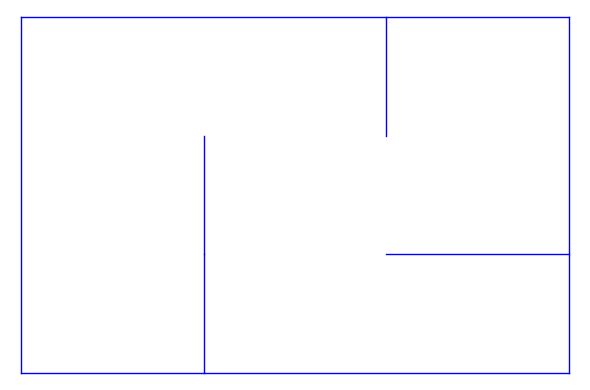

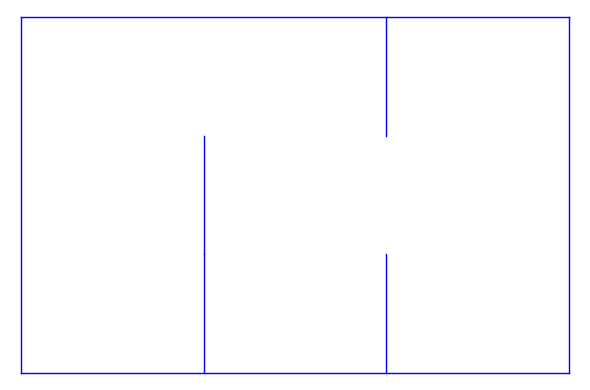

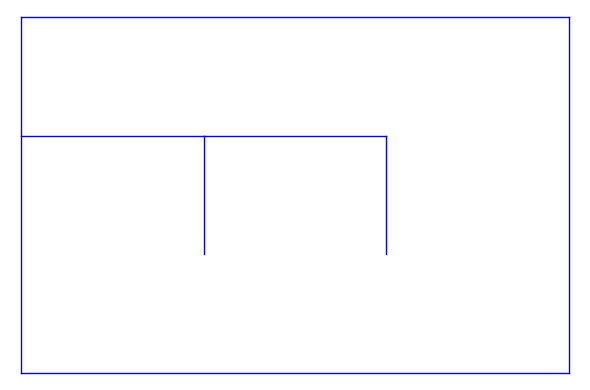

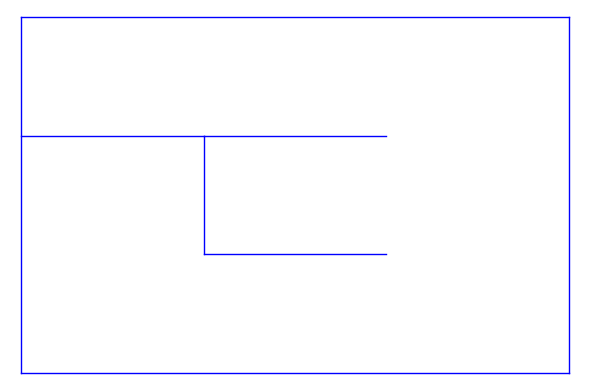

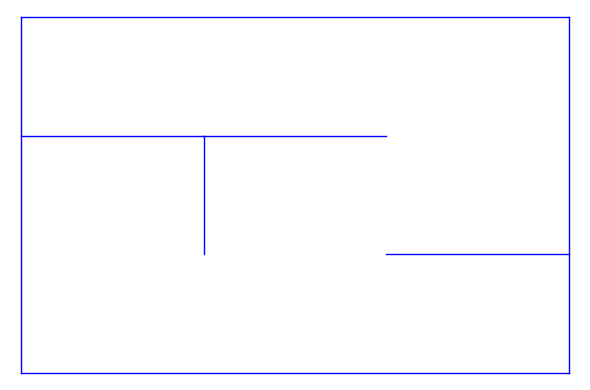

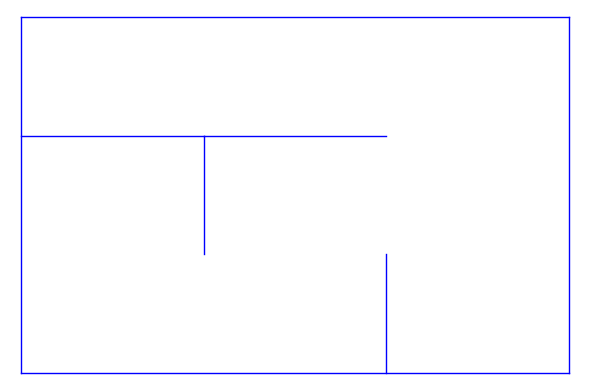

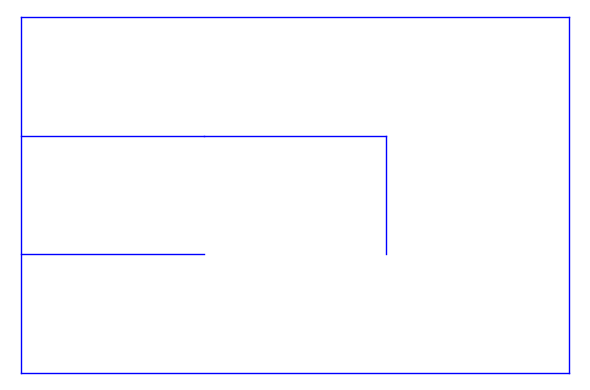

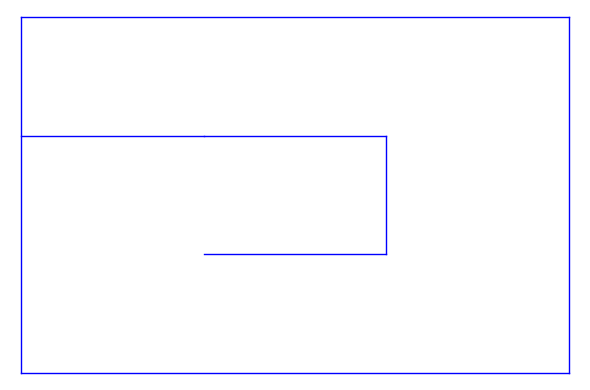

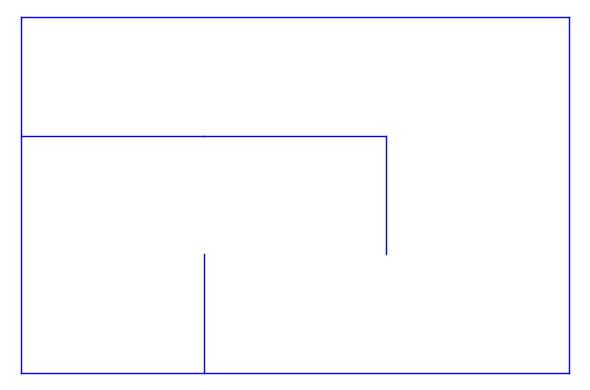

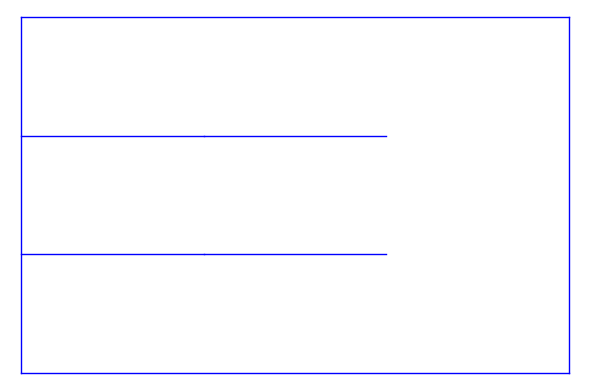

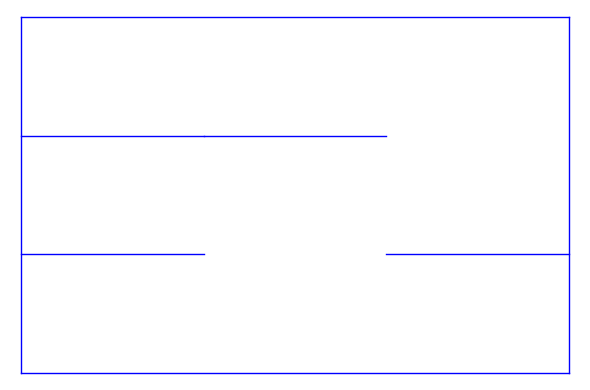

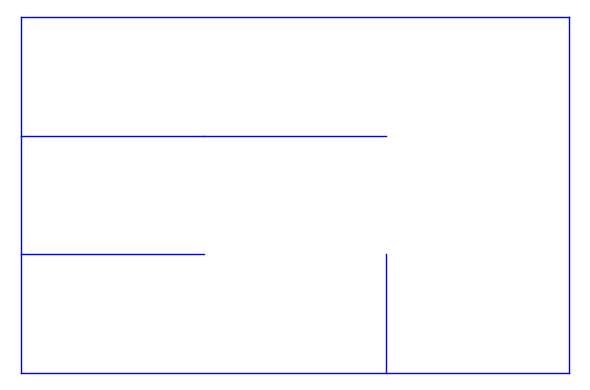

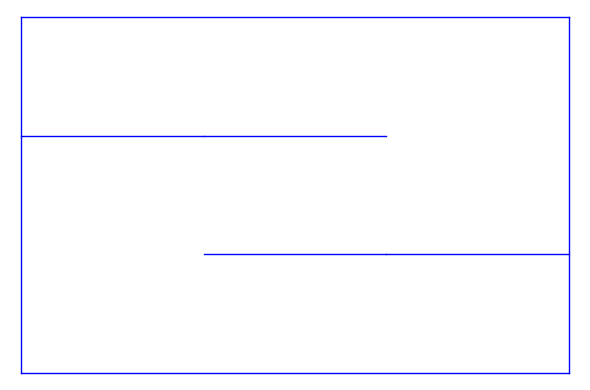

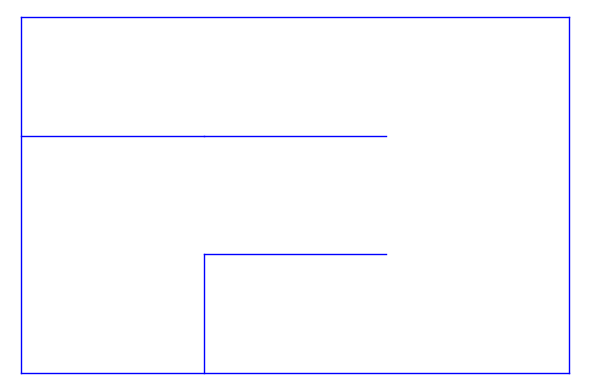

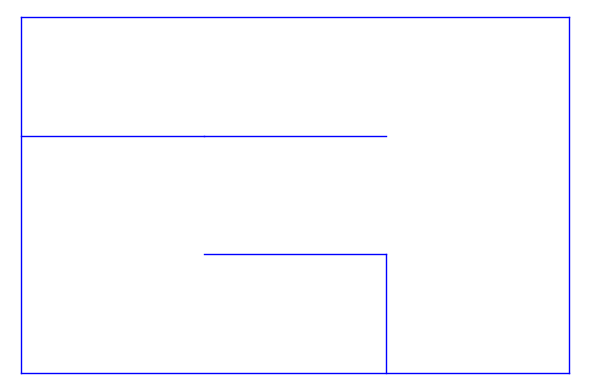

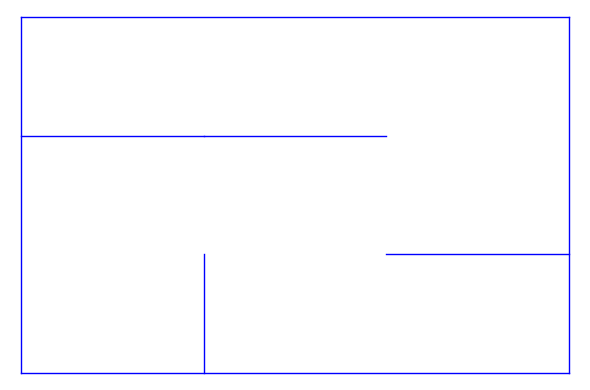

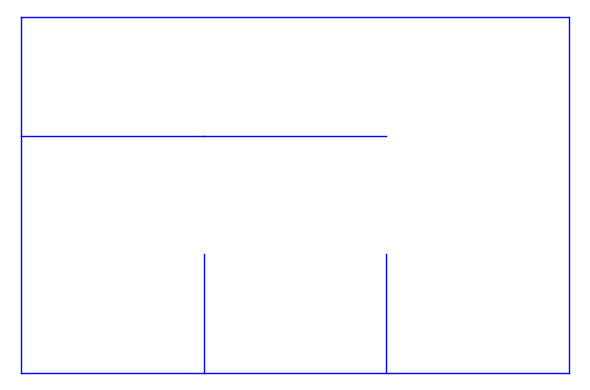

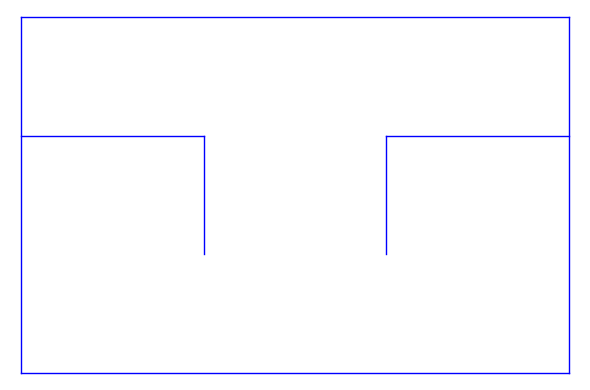

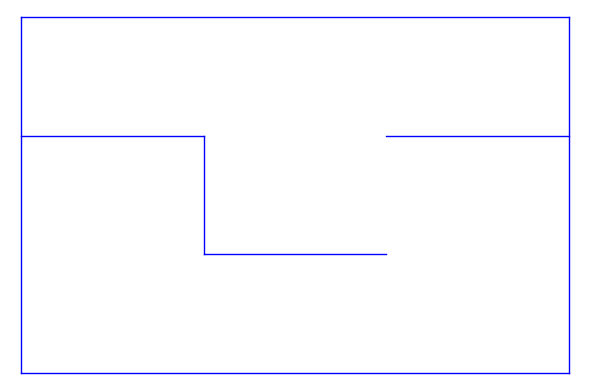

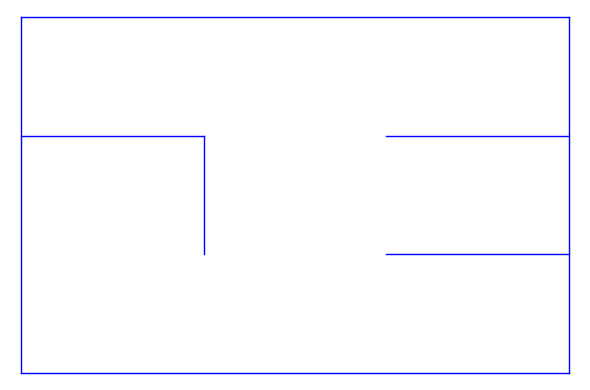

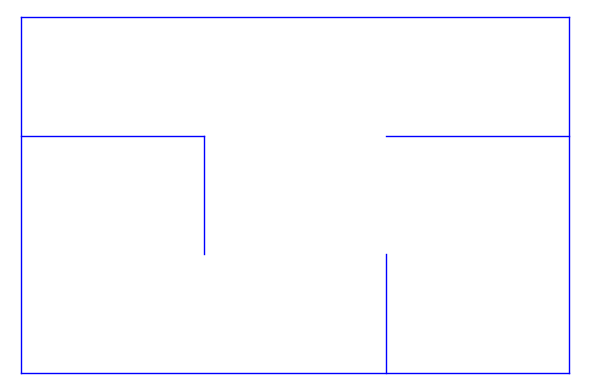

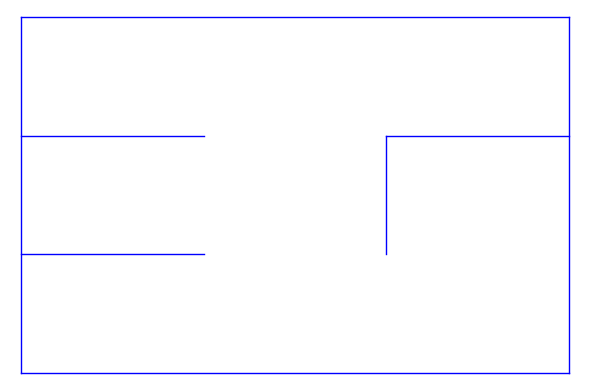

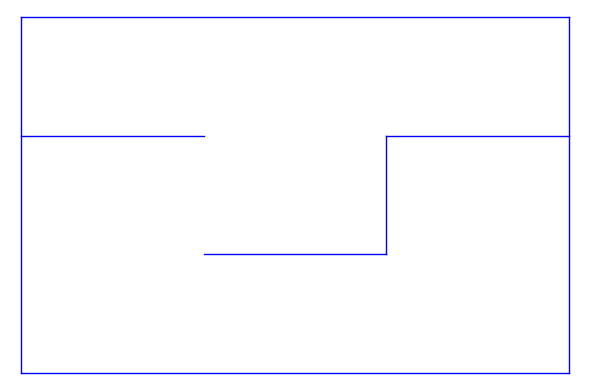

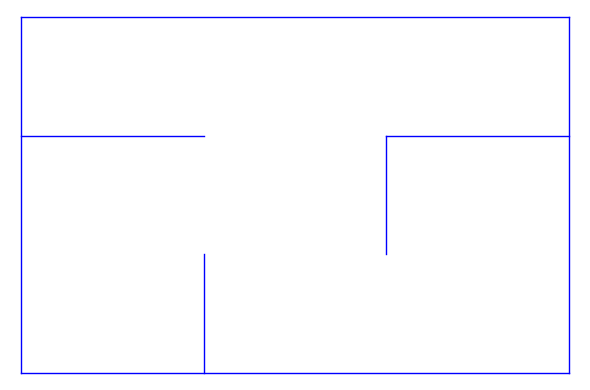

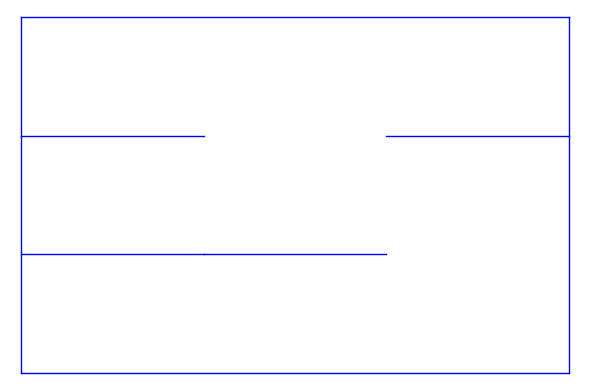

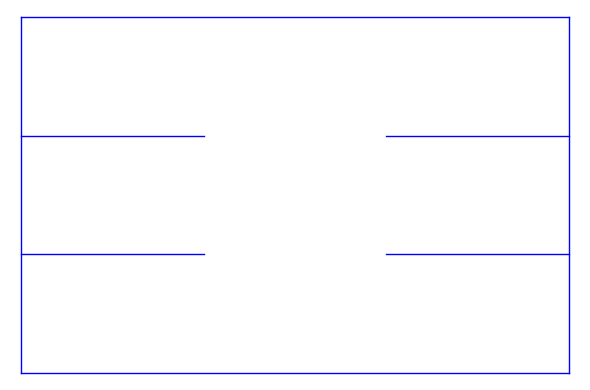

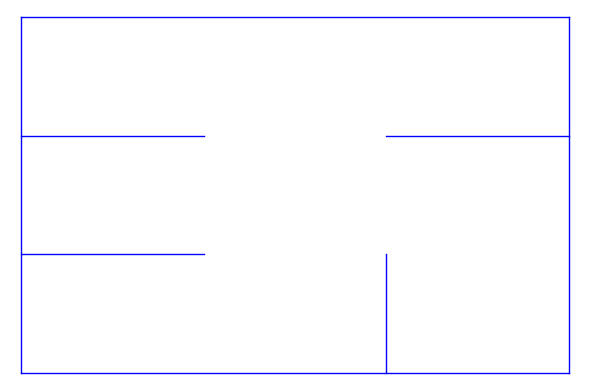

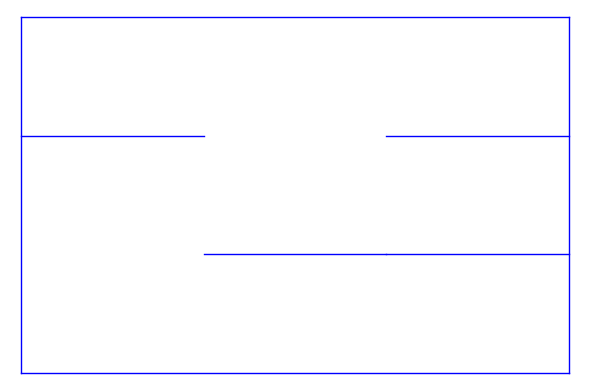

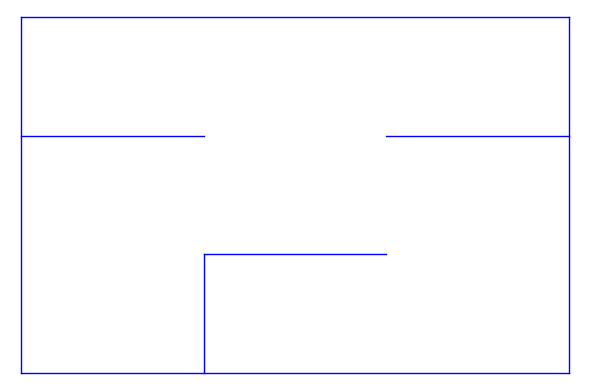

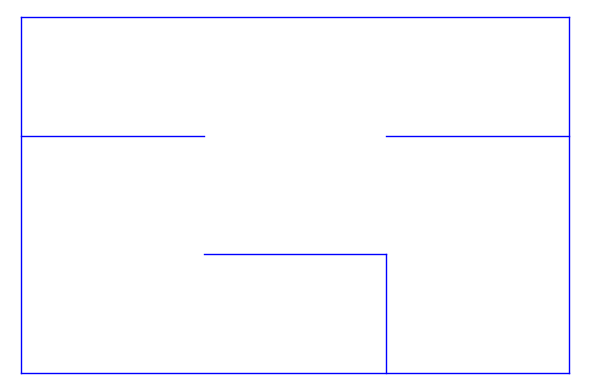

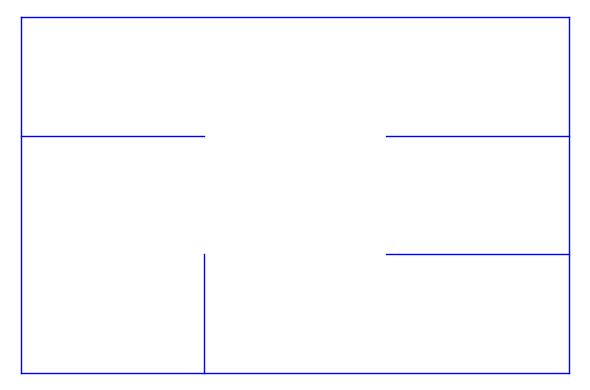

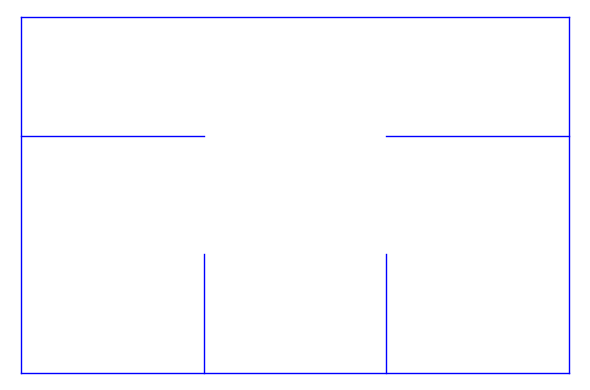

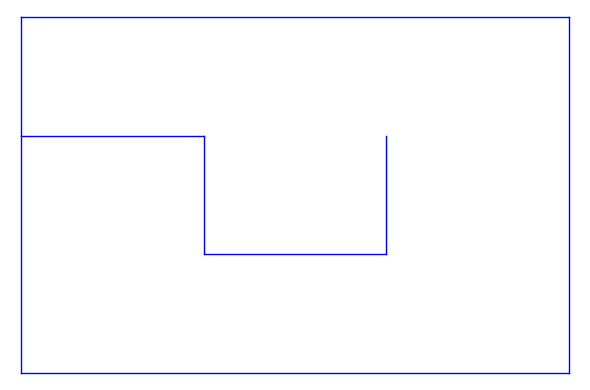

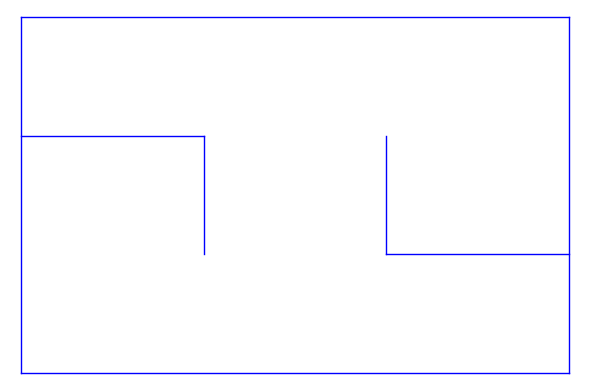

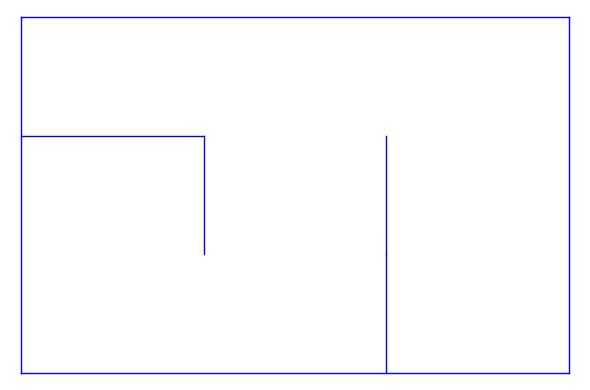

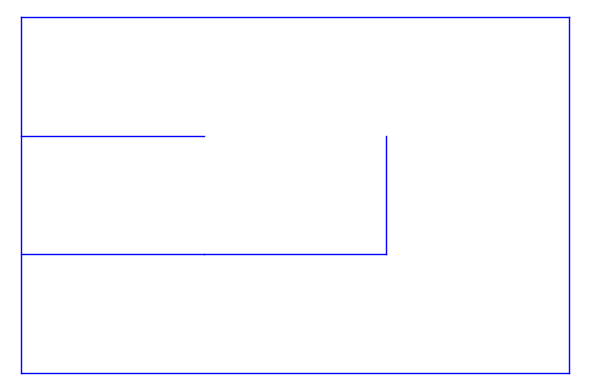

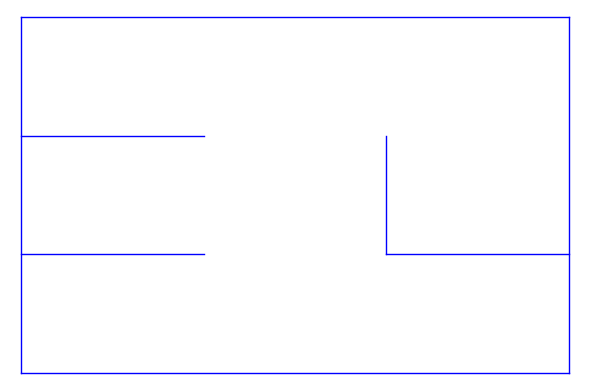

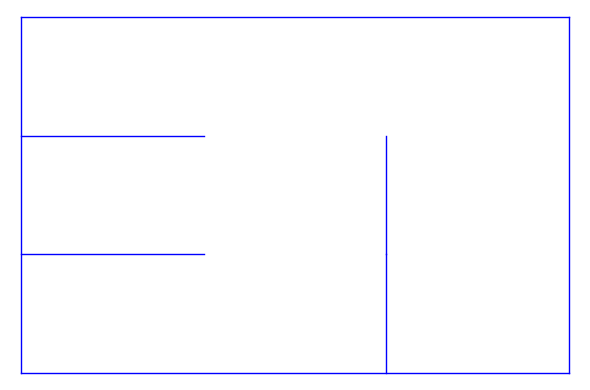

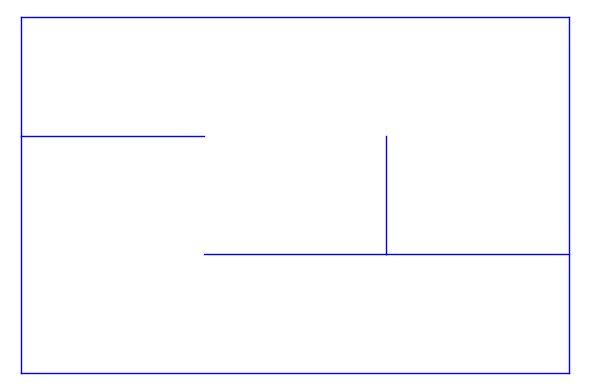

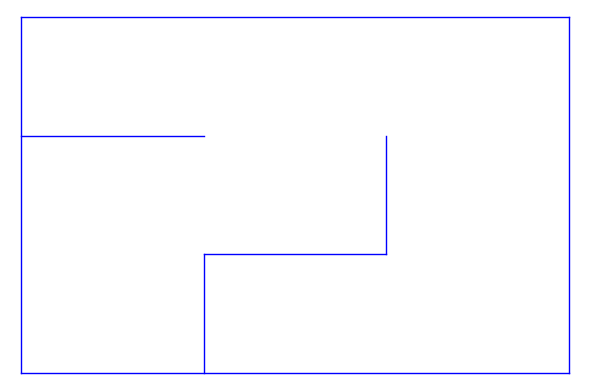

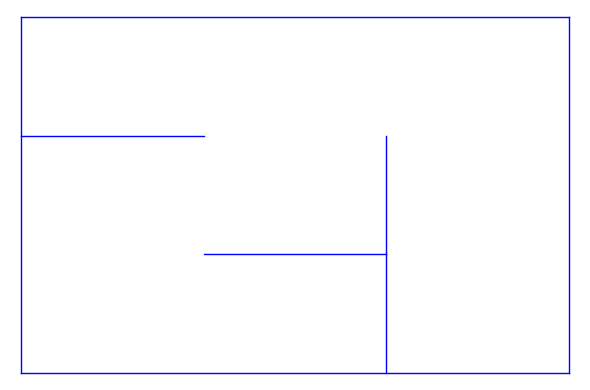

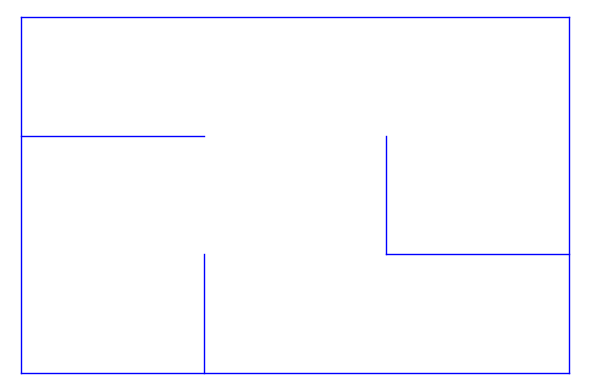

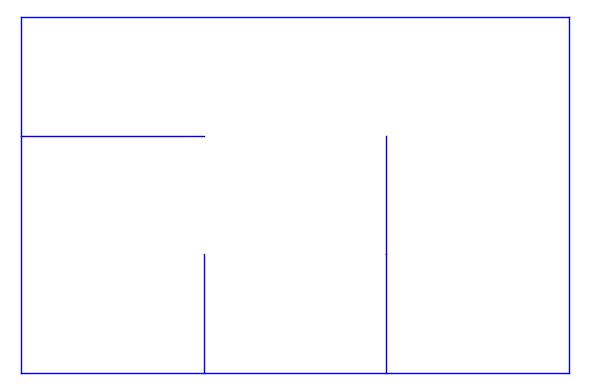

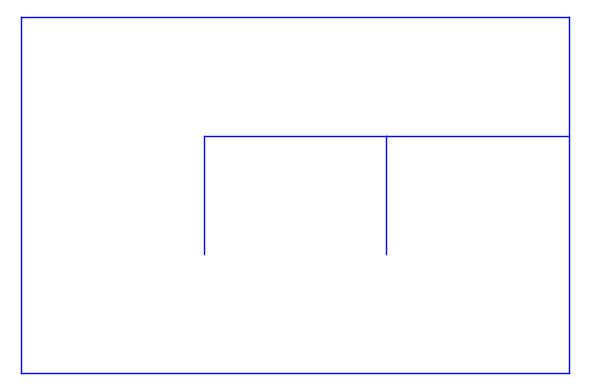

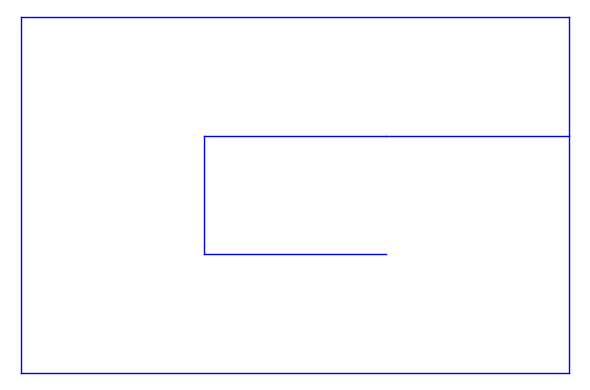

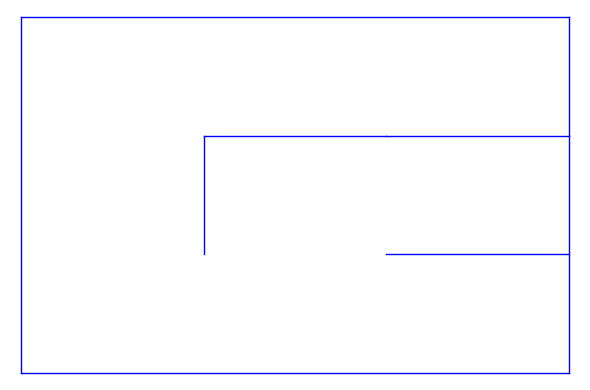

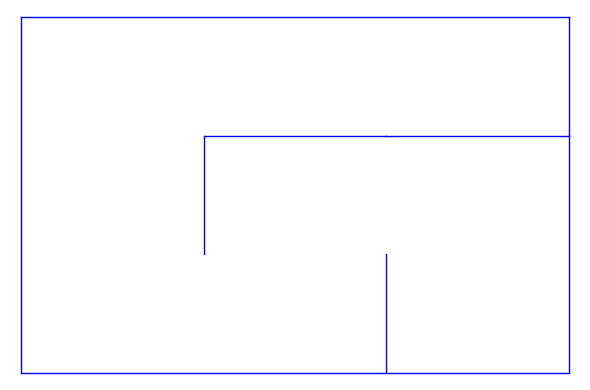

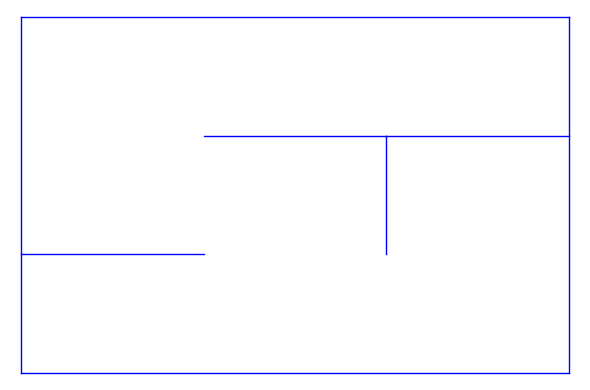

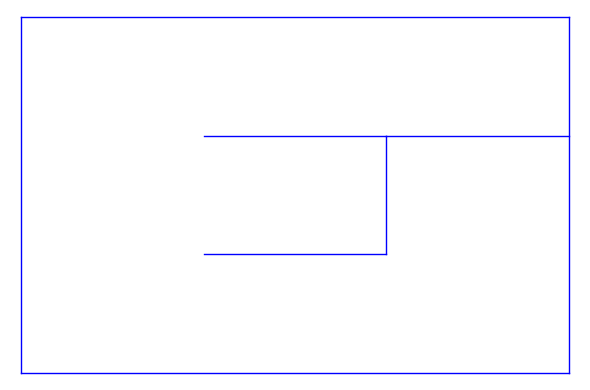

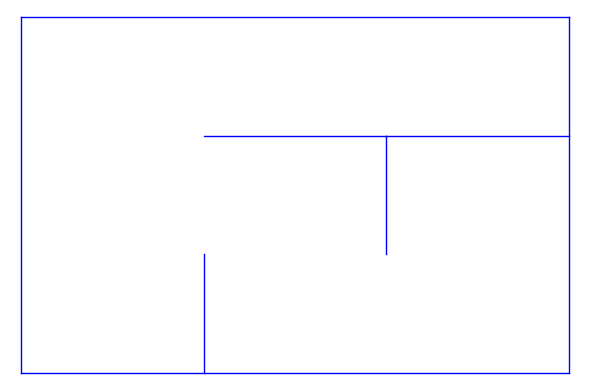

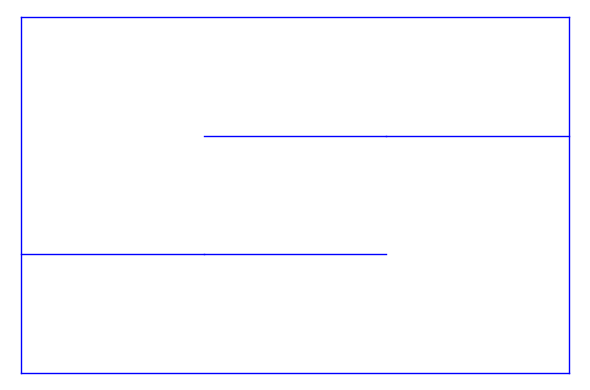

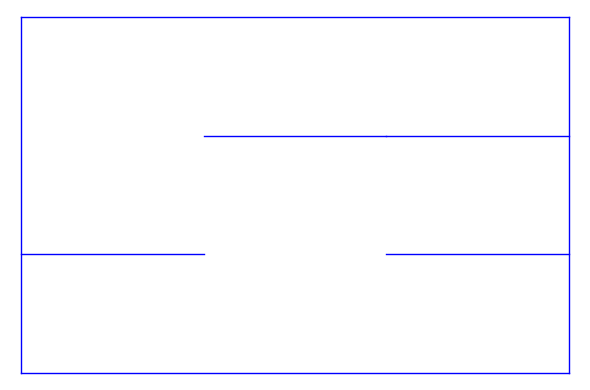

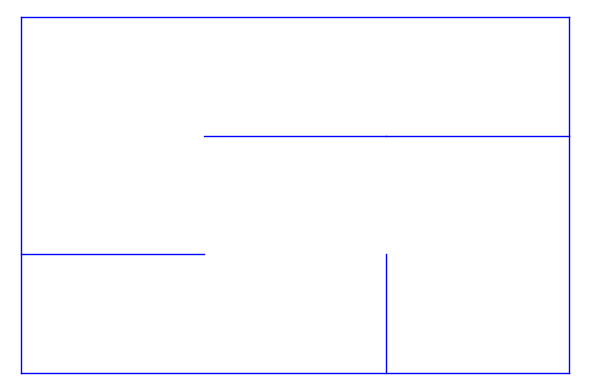

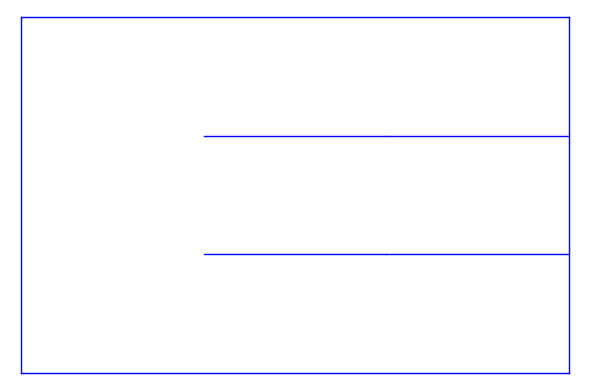

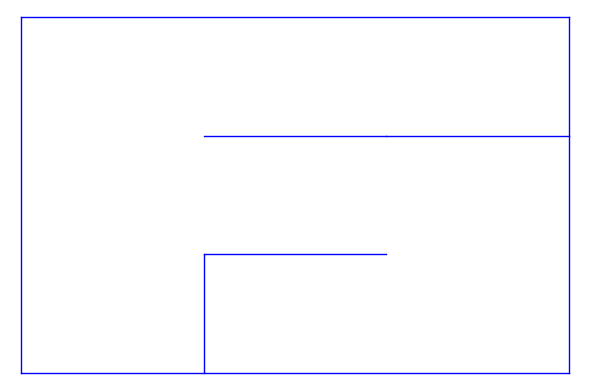

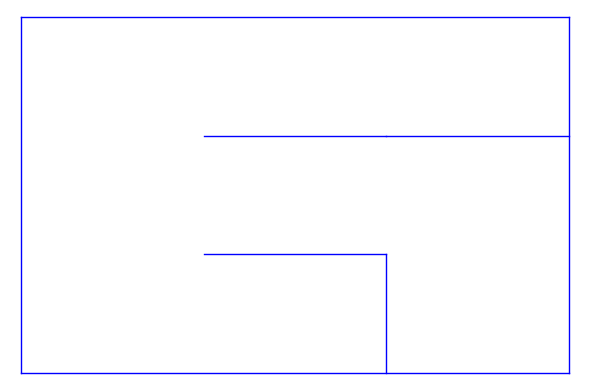

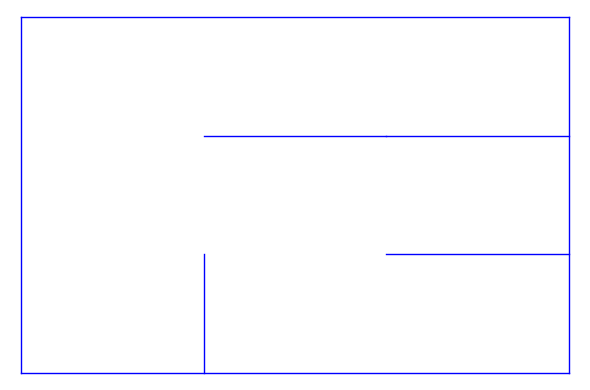

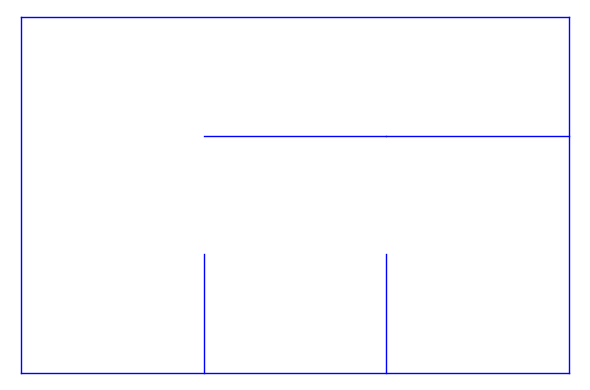

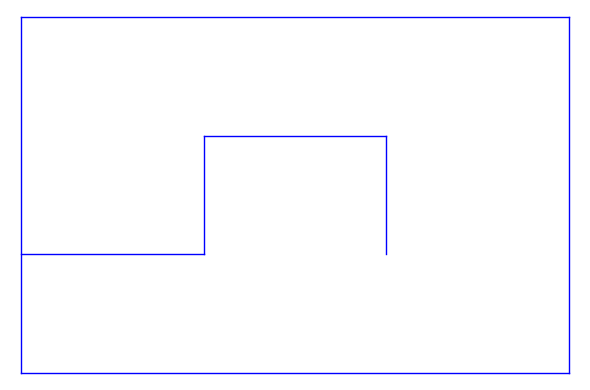

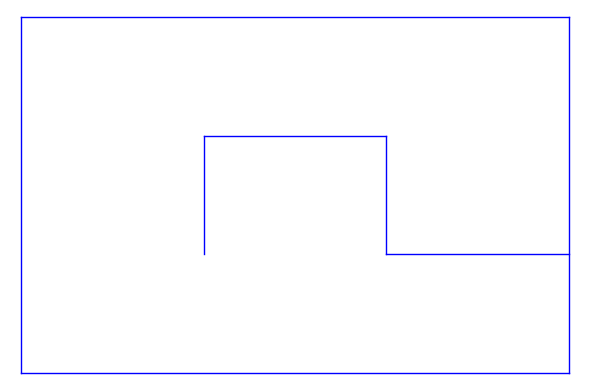

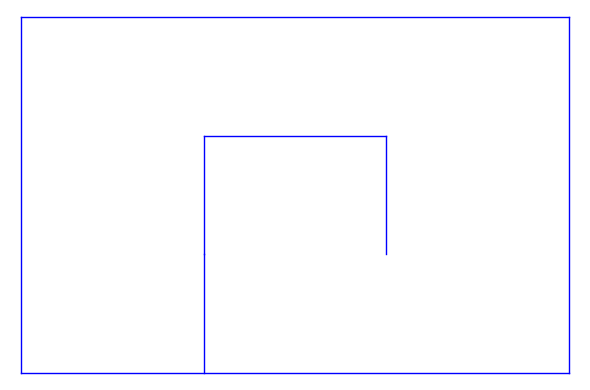

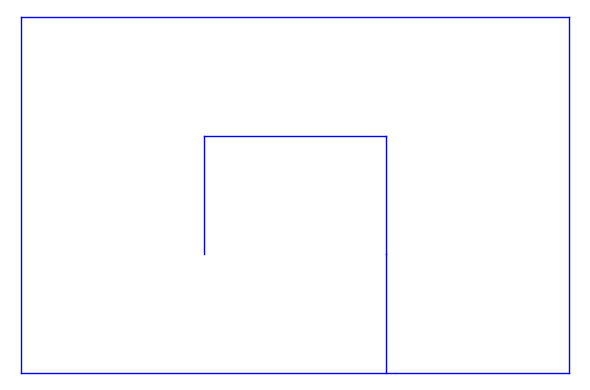

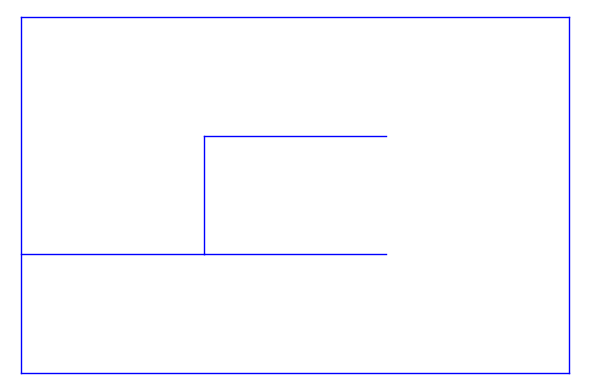

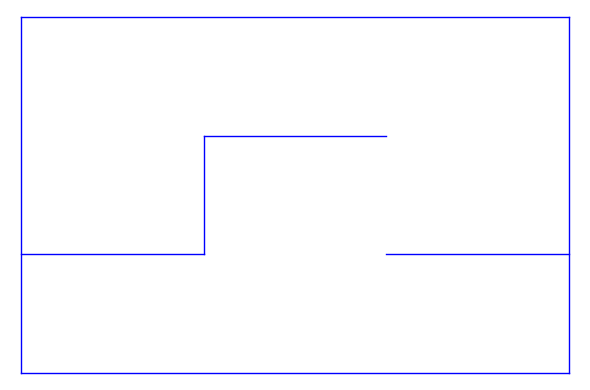

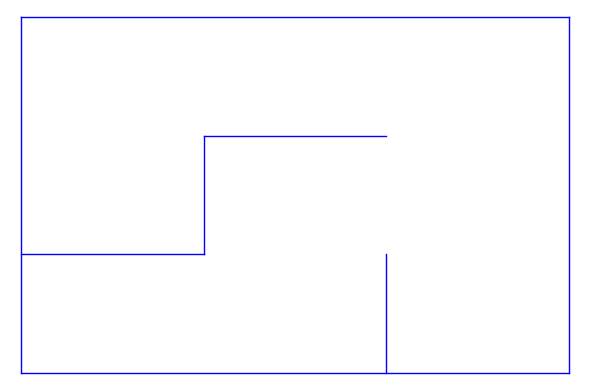

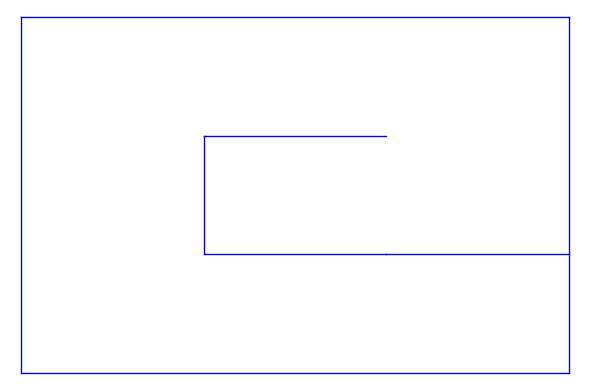

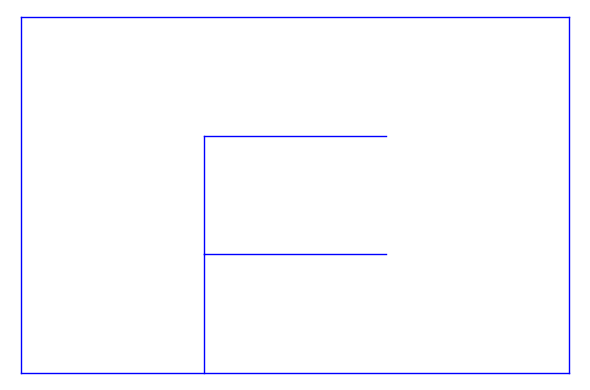

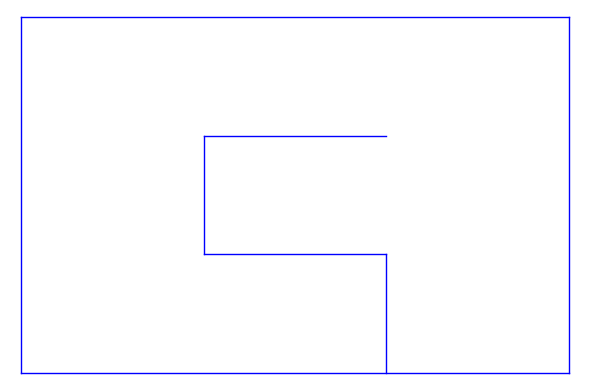

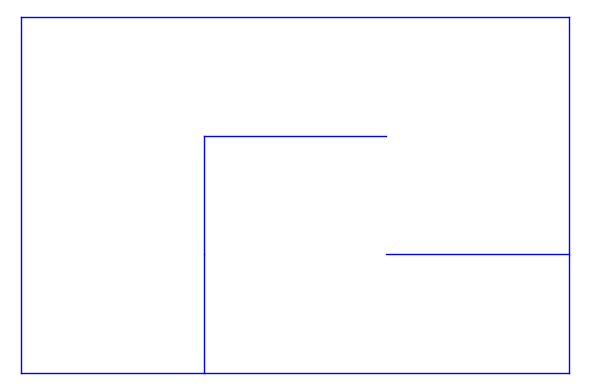

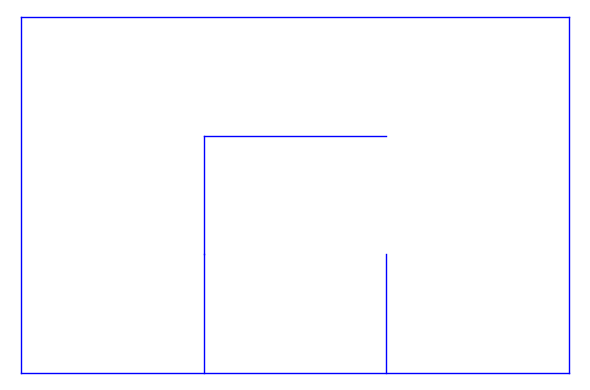

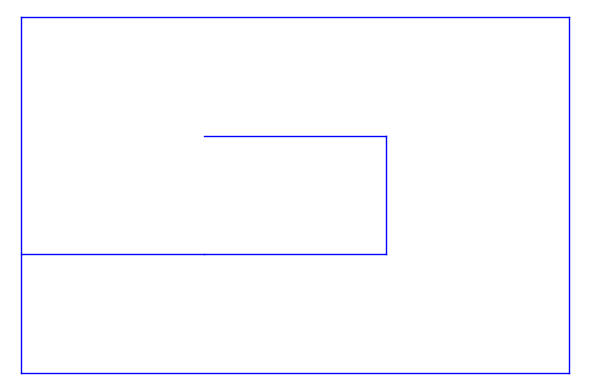

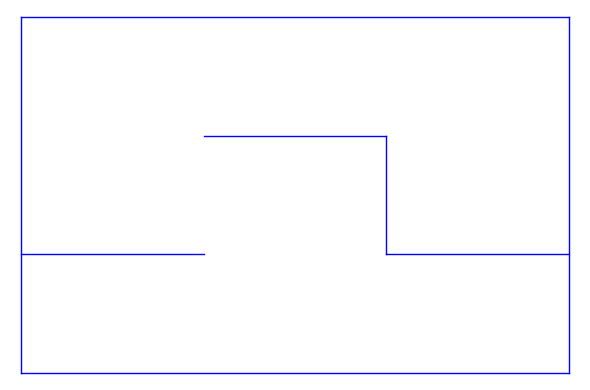

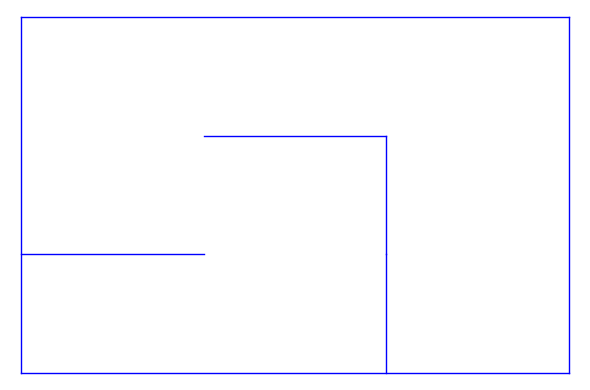

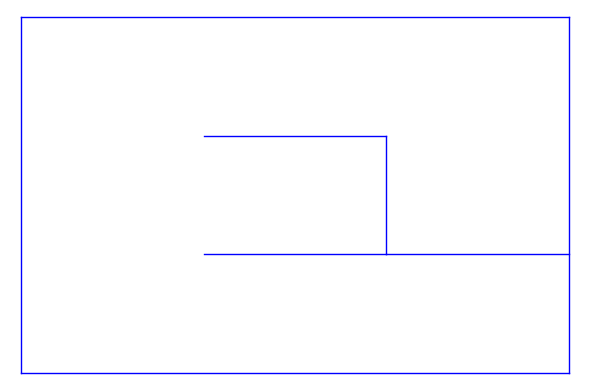

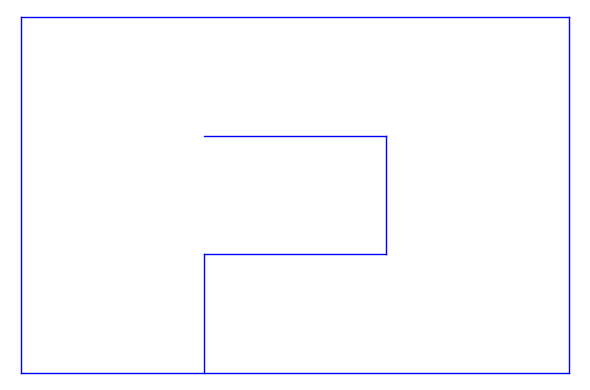

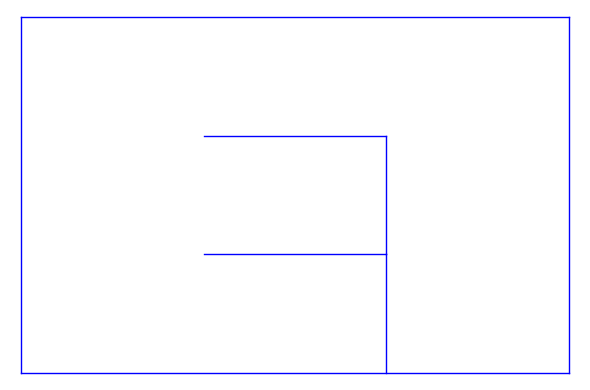

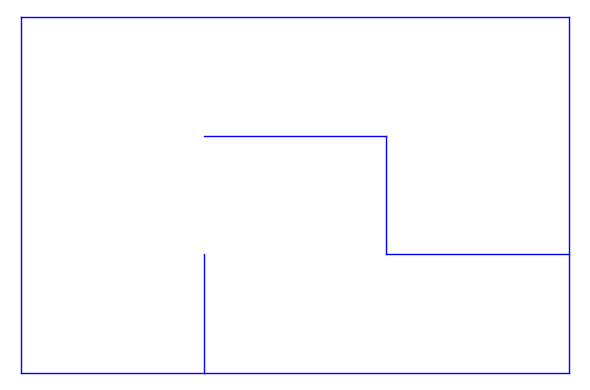

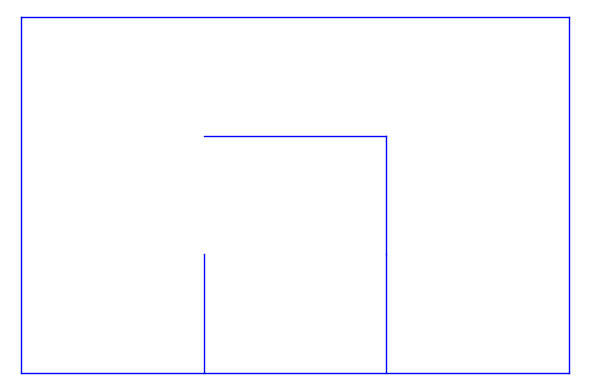

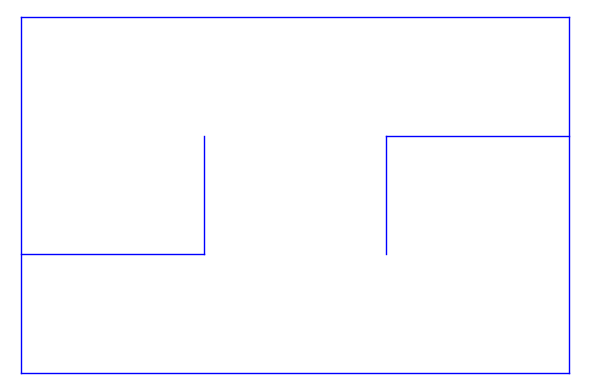

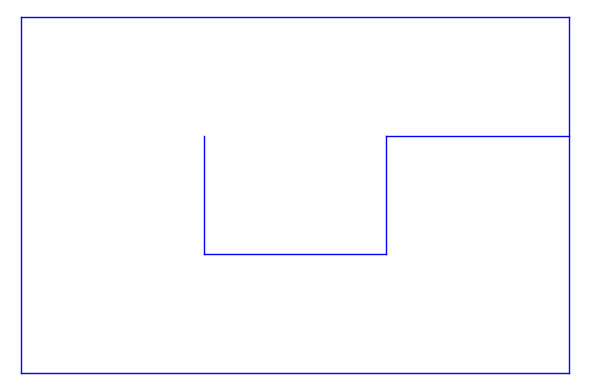

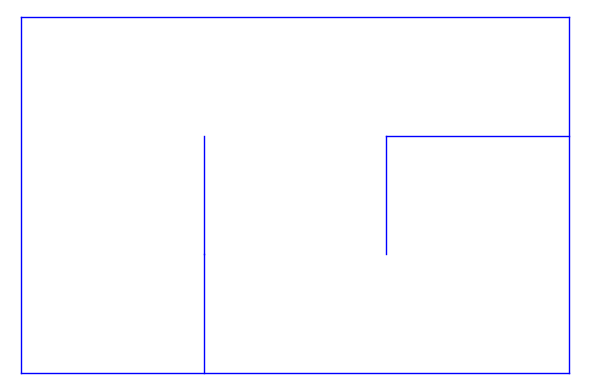

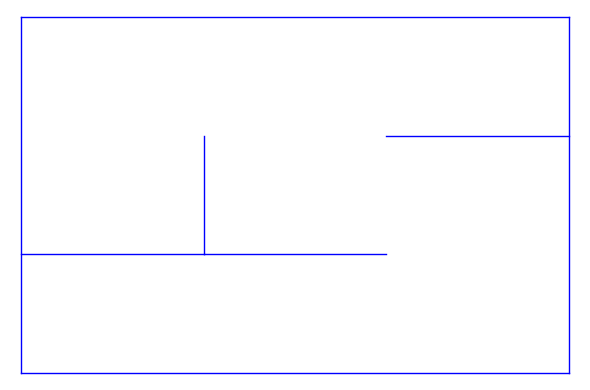

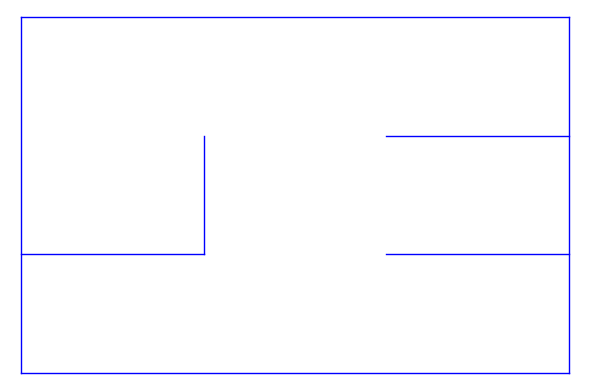

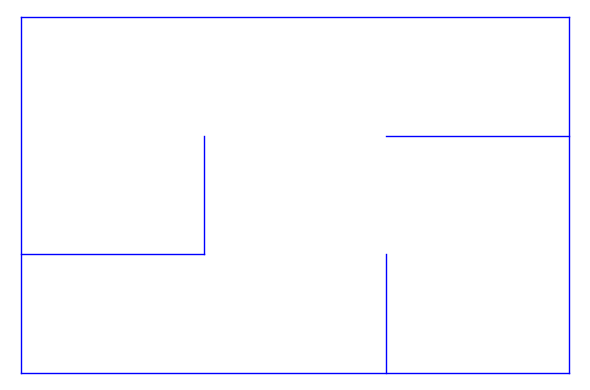

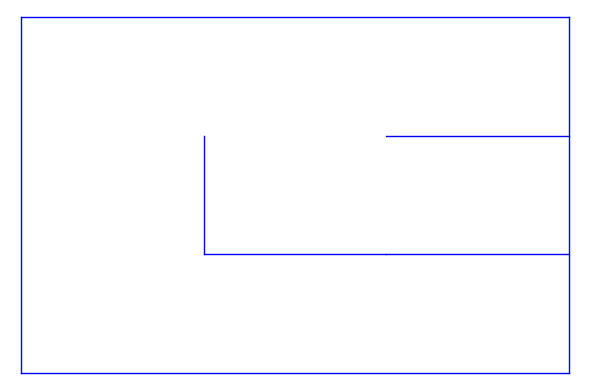

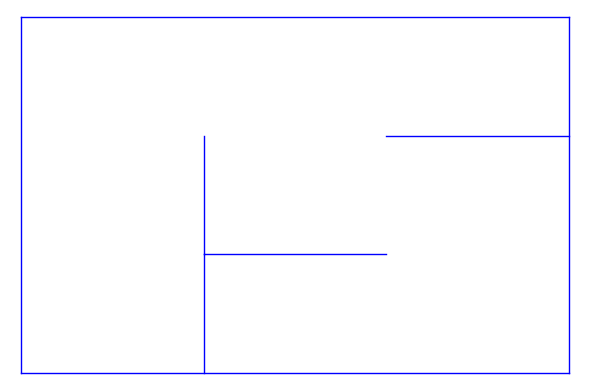

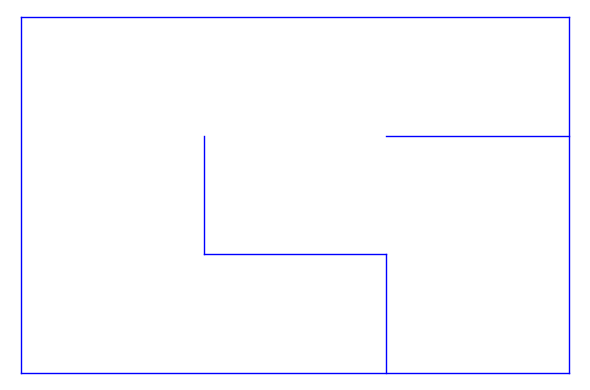

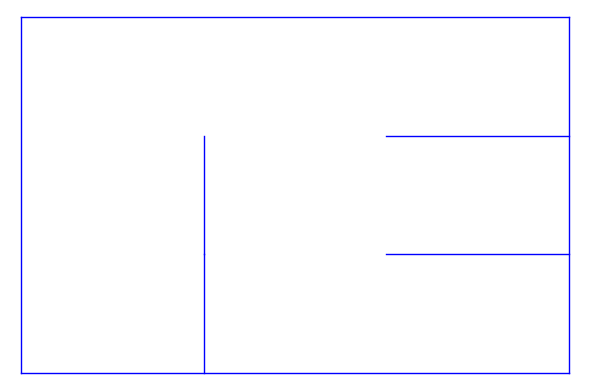

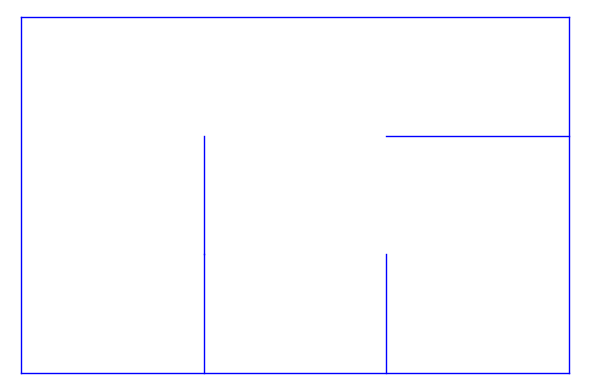

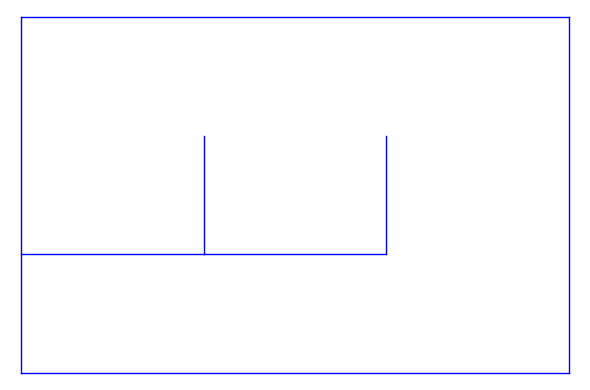

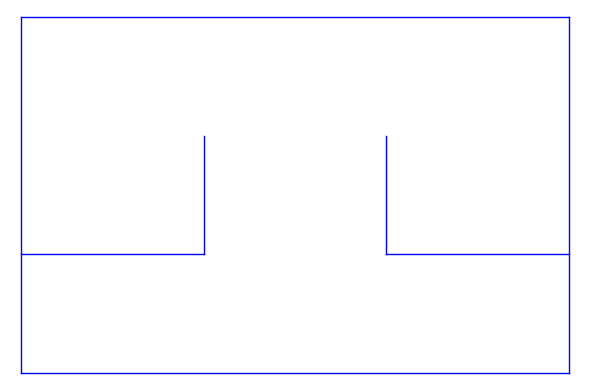

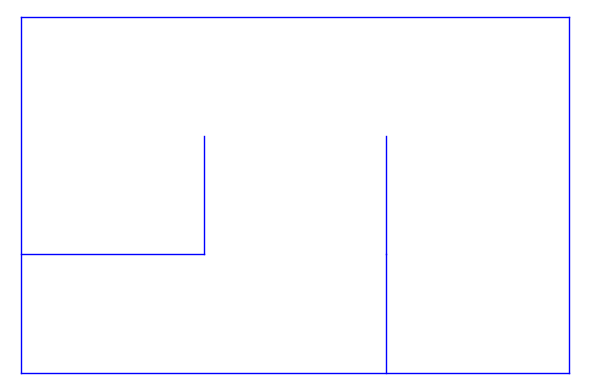

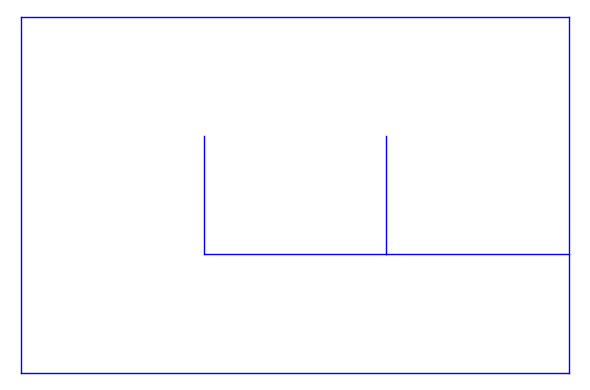

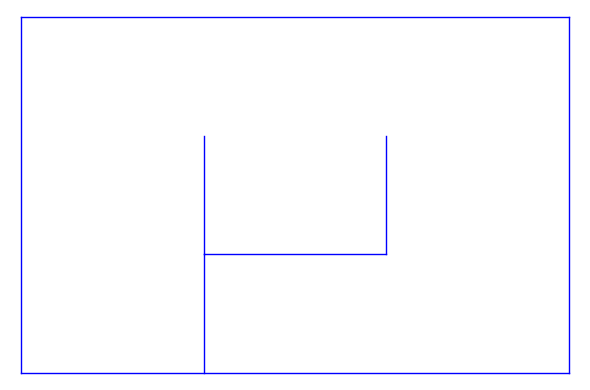

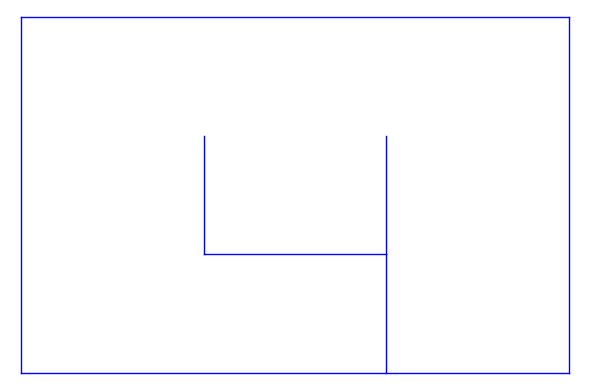

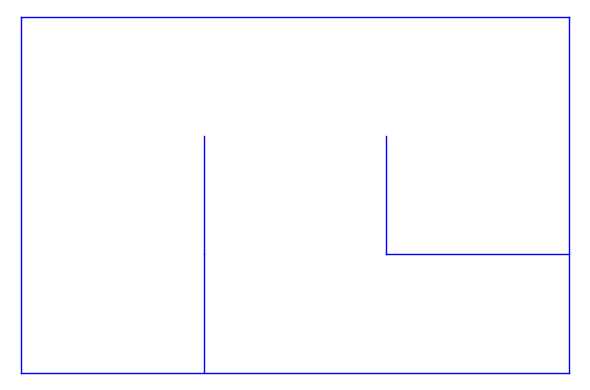

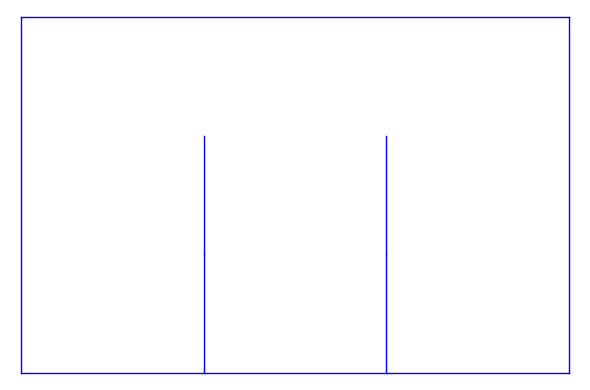

192

In [66]:
l = Labyrinthe((3, 3))
l.EnumereDessine()

In [67]:
l.CompteTotal()

192

#### Par les arbres couvrants

In [68]:
l.compteAC()

192.0

In [70]:
tableau((25, 25))

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
1,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2,1.0,4.000000e+00,1.500000e+01,5.600000e+01,2.090000e+02,7.800000e+02,2.911000e+03,1.086400e+04,4.054500e+04,1.513160e+05,...,4.088558e+08,1.525871e+09,5.694626e+09,2.125263e+10,7.931591e+10,2.960110e+11,1.104728e+12,4.122902e+12,1.538688e+13,5.742461e+13
3,1.0,1.500000e+01,1.920000e+02,2.415000e+03,3.030500e+04,3.801600e+05,4.768673e+06,5.981714e+07,7.503316e+08,9.411975e+09,...,3.666452e+16,4.599108e+17,5.769008e+18,7.236502e+19,9.077290e+20,1.138633e+22,1.428273e+23,1.791591e+24,2.247328e+25,2.818993e+26
4,1.0,5.600000e+01,2.415000e+03,1.003520e+05,4.140081e+06,1.705376e+08,7.022360e+09,2.891430e+11,1.190515e+13,4.901799e+14,...,2.388229e+24,9.833227e+25,4.048705e+27,1.667002e+29,6.863668e+30,2.826027e+32,1.163580e+34,4.790893e+35,1.972589e+37,8.121881e+38
5,1.0,2.090000e+02,3.030500e+04,4.140081e+06,5.575680e+08,7.479519e+10,1.002199e+13,1.342421e+15,1.797963e+17,2.408019e+19,...,1.389649e+32,1.861139e+34,2.492600e+36,3.338308e+38,4.470954e+40,5.987893e+42,8.019510e+44,1.074043e+47,1.438452e+49,1.926501e+51
6,1.0,7.800000e+02,3.801600e+05,1.705376e+08,7.479519e+10,3.256554e+13,1.414326e+16,6.136974e+18,2.662079e+21,1.154618e+24,...,7.684071e+39,3.332583e+42,1.445342e+45,6.268450e+47,2.718628e+50,1.179070e+53,5.113627e+55,2.217781e+58,9.618519e+60,4.171553e+63
7,1.0,2.911000e+03,4.768673e+06,7.022360e+09,1.002199e+13,1.414326e+16,1.987237e+19,2.787318e+22,3.906713e+25,5.474042e+28,...,4.138179e+47,5.797166e+50,8.121235e+53,1.137702e+57,1.593803e+60,2.232755e+63,3.127860e+66,4.381811e+69,6.138468e+72,8.599363e+75
8,1.0,1.086400e+04,5.981714e+07,2.891430e+11,1.342421e+15,6.136974e+18,2.787318e+22,1.262313e+26,5.709297e+29,2.580716e+33,...,2.195627e+55,9.919700e+58,4.481650e+62,2.024776e+66,9.147789e+69,4.132902e+73,1.867214e+77,8.435932e+80,3.811291e+84,1.721912e+88
9,1.0,4.054500e+04,7.503316e+08,1.190515e+13,1.797963e+17,2.662079e+21,3.906713e+25,5.709297e+29,8.326628e+33,1.213164e+38,...,1.154640e+63,1.680610e+67,2.446163e+71,3.560435e+75,5.182273e+79,7.542881e+83,1.097878e+88,1.597979e+92,2.325883e+96,3.385358e+100
10,1.0,1.513160e+05,9.411975e+09,4.901799e+14,2.408019e+19,1.154618e+24,5.474042e+28,2.580716e+33,1.213164e+38,5.694319e+42,...,6.038635e+70,2.829599e+75,1.325888e+80,6.212784e+84,2.911149e+89,1.364087e+94,6.391742e+98,2.994996e+103,1.403373e+108,6.575820e+112


## Sortir d'un labyrinthe

In [76]:
def solution_labyrinthe(l_murs, i, j, last, d):
    # mur -> [h, d, b, g]
    taille = (len(l_murs), len(l_murs[0]))
    d += 1

    if i == taille[0] - 1 and j == taille[1] - 1:
        global s
        s = d
        return
    else:
        if l_murs[i, j, 1] == 0 and last != 3:
            solution_labyrinthe(l_murs, i, j+1, 1, d)
        if l_murs[i, j, 0] == 0 and last != 2:
            solution_labyrinthe(l_murs, i+1, j, 0, d)
        if l_murs[i, j, 3] == 0 and last != 1:
            solution_labyrinthe(l_murs, i, j-1, 3, d)
        if l_murs[i, j, 2] == 0 and last != 0:
            solution_labyrinthe(l_murs, i-1, j, 2, d)
            

In [77]:
resultats = []
for j in range(1, 10):
    mini = 0
    maxi = 0
    taille = (j, j)
    v = [] 
    for i in range (0, 100):
        s = 0
        cases, murs, l = labyrinthe_generator(taille, 2)
        solution_labyrinthe(murs, 0, 0, -1, 0)
        if s > maxi:
            maxi = s
        if s < mini or mini == 0:
            mini = s
        v.append(s)
    resultats.append({ "Moyen":(sum(v)/len(v)).round(), "Court":mini, "Long":maxi})
resultats

[{'Moyen': 1, 'Court': 1, 'Long': 1},
 {'Moyen': 3, 'Court': 3, 'Long': 3},
 {'Moyen': 6, 'Court': 5, 'Long': 9},
 {'Moyen': 9, 'Court': 7, 'Long': 15},
 {'Moyen': 12, 'Court': 9, 'Long': 21},
 {'Moyen': 16, 'Court': 11, 'Long': 33},
 {'Moyen': 21, 'Court': 13, 'Long': 39},
 {'Moyen': 24, 'Court': 15, 'Long': 49},
 {'Moyen': 30, 'Court': 17, 'Long': 59}]